## Import Statements

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

c:\Users\jslon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Functions

In [2]:
def GetKeithly(filename):
  try:
    df = pd.read_csv(filename, skiprows=list(range(0,8)),encoding='latin-1')
    vals = df['Reading'].values
    return vals
  except:
    print(f'Error reading {filename}')

def GetKeithTimes(filename):
  try:
    df = pd.read_csv(filename, skiprows=list(range(0,8)),encoding='latin-1')
    vals = df['Relative Time'].values
    return vals
  except:
    print(f'Error reading {filename}')

def GetKeysight(filename):
  try:
    df = pd.read_csv(filename, skiprows=list(range(0,1)),encoding='latin-1')
    vals = df['Reading'].values
    return vals
  except:
    print(f'Error reading {filename}')

## DMM Synching Cont.

New Signal

In [3]:
Keith6 = GetKeithly('Data_6a.csv')

Key6 = GetKeysight('DATA_6.csv')

KeithLen6 = len(Keith6)

KeyLen6 = len(Key6)

xvals6 = np.array(list(range(KeyLen6))) #if KeithLen6 == KeyLen6 else 'Error'

In [4]:
print(KeithLen6)

10000


In [5]:
#Note settings same as other 100Hz

In [6]:
#Analyze 6-Data

In [7]:
print('Frequency was 100Hz')
print('Delay was 0μs')
print('Sample Rate was 5kHz')

Frequency was 100Hz
Delay was 0μs
Sample Rate was 5kHz


Raw signal data

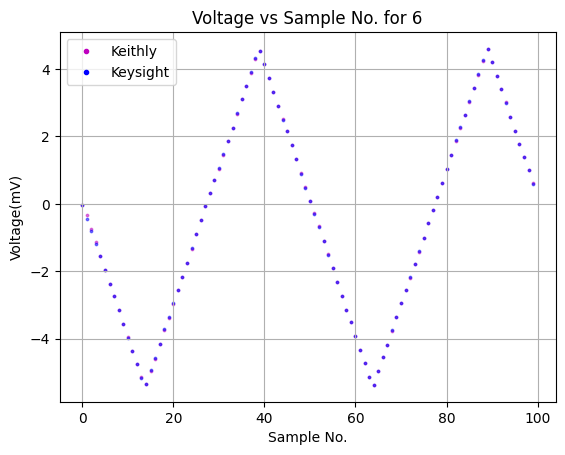

In [8]:
range6 = 100

plt.scatter(xvals6[:range6],1000*Keith6[:range6],s=3,c='m',alpha=0.5)
plt.scatter(xvals6[:range6],1000*Key6[:range6],s=3,c='b',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Sample No. for 6')
plt.legend()
plt.grid()

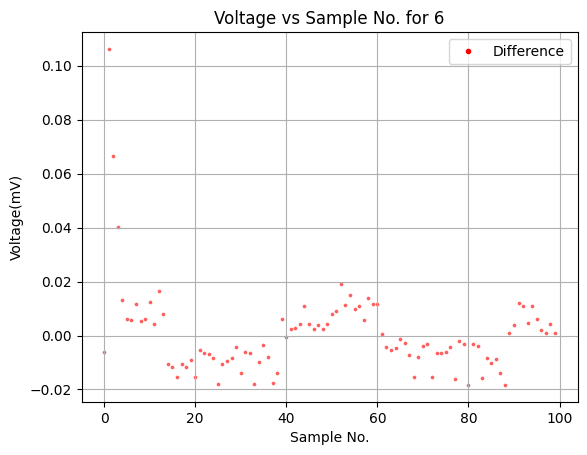

In [9]:
plt.scatter(xvals6[:range6],1000*(Keith6[:range6]-Key6[:range6]),s=3,c='r',alpha=0.5)
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Sample No. for 6')
plt.legend()
plt.grid()

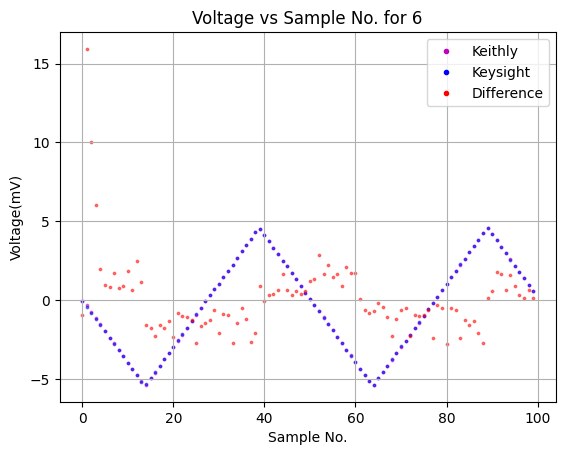

In [10]:
plt.scatter(xvals6[:range6],1000*Keith6[:range6],s=3,c='m',alpha=0.5)
plt.scatter(xvals6[:range6],1000*Key6[:range6],s=3,c='b',alpha=0.5)
plt.scatter(xvals6[:range6],150000*(Keith6[:range6]-Key6[:range6]),s=3,c='r',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Sample No. for 6')
plt.legend()
plt.grid()

In [11]:
Times6 = GetKeithTimes('Data_6a.csv')

In [12]:
dt6 = Times6[1:] - Times6[:-1]

Plotting distribution of times between samples

(array([   0.,    0.,    0.,    0.,    0.,    0.,  636.,  109.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 1231., 3567.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         919., 3099.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([0.00019935, 0.00019935, 0.00019935, 0.00019936, 0.00019936,
        0.00019936, 0.00019936, 0.00019936, 0.00019937, 0.00019937,
        0.00019937, 0.00019937, 0.00019937, 0.00019938, 0.00019938,
        0.00019938, 0.00019938, 0.00019938, 0.00019939, 0.00019939,
        0.00019939, 0.00019939, 0.00019939, 0.0001994 , 0.0001994 ,
        0.0001994 , 0.0001994 , 0.0001994 , 0.00019941, 0.00019941,
        0.00019941, 0.00019941, 0.00019941, 0.00019942, 0.00019942,
        0.00019942, 0.00019942, 0.00019942, 0.00019943, 0.00019943,
        0.00019943, 0.00019943, 0.00019943, 0.00019944, 

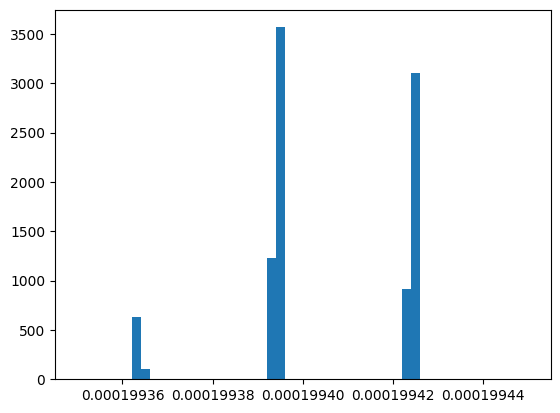

In [13]:
plt.hist(dt6,bins=50,range=[0.00019935,0.00019945])

In [14]:
avgdt6 = np.mean(dt6)
print(f'{round(avgdt6*1000,6)}ms')

0.199401ms


In [15]:
a = (0.01/(5/0.000199401))*1000*1000
b = 0.02/(5/0.000199401)*1000*1000
print(f'Delay - {round(a,2)}-{round(b,2)}us')
print(f'Ratio - {round(5/0.02)}-{round(5/0.01)}')

Delay - 0.4-0.8us
Ratio - 250-500


In [16]:
#Slot 1-4 det 646 Keith
#Slot 1-2 det 647 Key
#Sample 5kHz
#Source A
#100Hz settings for aquire
#Power Source -40-9dBm

## QH Phase Data, Two DMMs, Detector Behavior

In [17]:
def QHRead(ver: str, QHnum = '1'):
  PWRvals = np.arange(-40,10,1)
  Keithfile = 'QH_'+ QHnum + '-4_' + ver + '.csv'
  Keyfile = 'QH_' + QHnum + '-2_' + ver + '.csv'
  Keithvals = GetKeithly(Keithfile)
  Keyvals = GetKeysight(Keyfile)
  vals_1_4 = []
  vals_1_2 = []
  for i in range(1,51):
    vals_1_4.append(Keithvals[(i-1)*1000:i*1000])
    vals_1_2.append(Keyvals[(i-1)*1000:i*1000])
  return PWRvals, vals_1_4, vals_1_2

Pulling the fitting tranforms for the 647 detector, as one output slot with have det646 and one will have det647, slot4 = 646, slot2 - 647

In [18]:
lfunc647 = lambda x: 1.066*x - 0.00006203
efunc647 = lambda x: -17.18*np.exp(-0.062*x) + 17.18
sfunc647 = lambda x: 0.02852*np.sin(38.03*x + 5.907) + 0.01046

the exponential fit function is used by default

In [19]:
corrfunc = lambda v647: efunc647(v647)

In [20]:
PWRvals, vals_1_4_v1, vals_1_2_v1 = QHRead('v1')

In [21]:
meanvals_1_4_v1 = np.array([1000*np.mean(valarray) for valarray in vals_1_4_v1]) #det646
meanvals_1_2_v1 = np.array([1000*np.mean(corrfunc(valarray)) for valarray in vals_1_2_v1]) #det647

This plots the voltage curves for both slots, with the transform applied to the det647 data

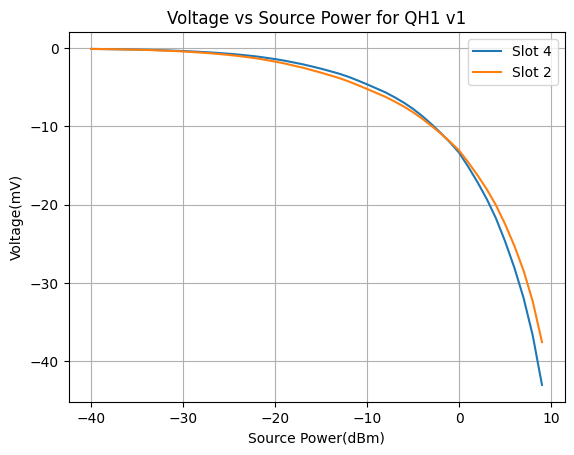

In [22]:
plt.plot(PWRvals,meanvals_1_4_v1,label='Slot 4')
plt.plot(PWRvals,meanvals_1_2_v1,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v1')
plt.legend()
plt.grid()

In [23]:
total_v1 = meanvals_1_4_v1 + meanvals_1_2_v1
frac_1_4_v1 = 100*meanvals_1_4_v1/total_v1
frac_1_2_v1 = 100*meanvals_1_2_v1/total_v1

This plots the power distribution between the two slots

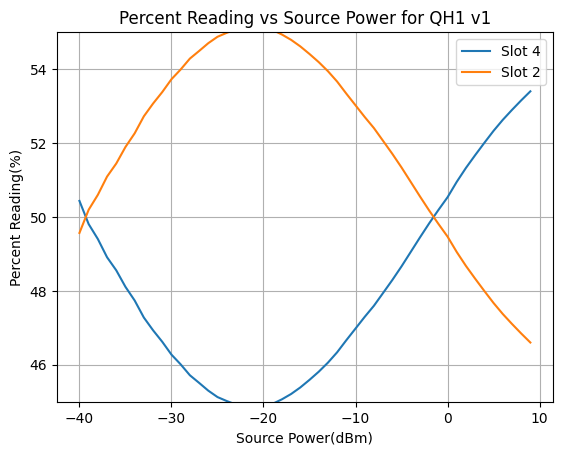

In [24]:
plt.plot(PWRvals,frac_1_4_v1,label='Slot 4')
plt.plot(PWRvals,frac_1_2_v1,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v1')
plt.ylim(45,55)
plt.legend()
plt.grid()

In [25]:
#for v2 flip the detector setup

The detectors' respective slots are flipped and the same as above is done

In [26]:
PWRvals, vals_1_4_v2, vals_1_2_v2 = QHRead('v2')

In [27]:
meanvals_1_4_v2 = np.array([1000*np.mean(corrfunc(valarray)) for valarray in vals_1_4_v2]) #det647
meanvals_1_2_v2 = np.array([1000*np.mean(valarray) for valarray in vals_1_2_v2]) #det646

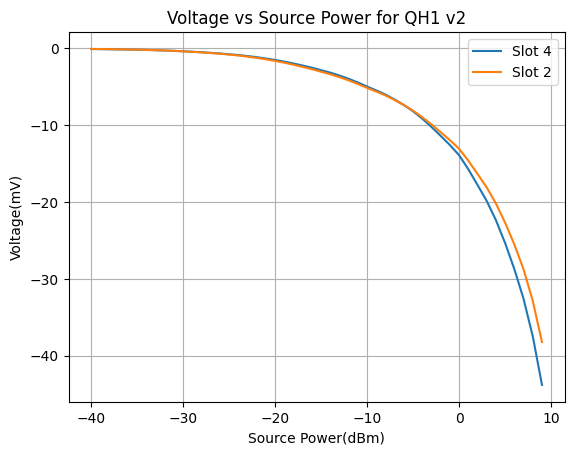

In [28]:
plt.plot(PWRvals,meanvals_1_4_v2,label='Slot 4')
plt.plot(PWRvals,meanvals_1_2_v2,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v2')
plt.legend()
plt.grid()

In [29]:
total_v2 = meanvals_1_4_v2 + meanvals_1_2_v2
frac_1_4_v2 = 100*meanvals_1_4_v2/total_v2
frac_1_2_v2 = 100*meanvals_1_2_v2/total_v2

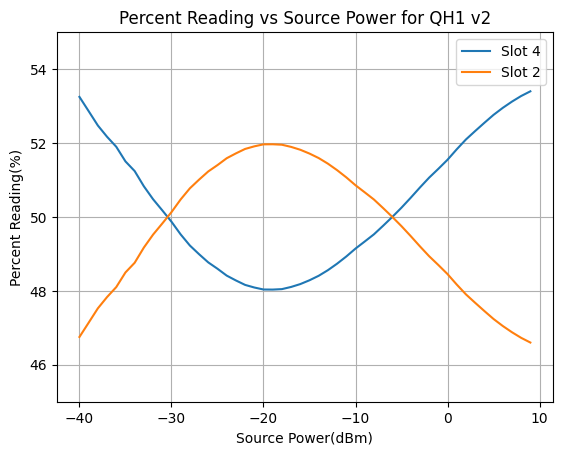

In [30]:
plt.plot(PWRvals,frac_1_4_v2,label='Slot 4')
plt.plot(PWRvals,frac_1_2_v2,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v2')
plt.ylim(45,55)
plt.legend()
plt.grid()

In [31]:
#Compare v1 and v2

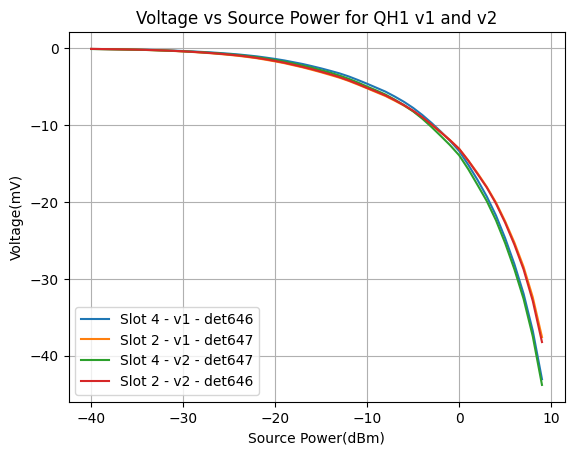

In [32]:
plt.plot(PWRvals,meanvals_1_4_v1,label='Slot 4 - v1 - det646')
plt.plot(PWRvals,meanvals_1_2_v1,label='Slot 2 - v1 - det647')
plt.plot(PWRvals,meanvals_1_4_v2,label='Slot 4 - v2 - det647')
plt.plot(PWRvals,meanvals_1_2_v2,label='Slot 2 - v2 - det646')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v1 and v2')
plt.legend()
plt.grid()

This is the power distribution from all trials, the assymetry is likely due to differences between the detectors

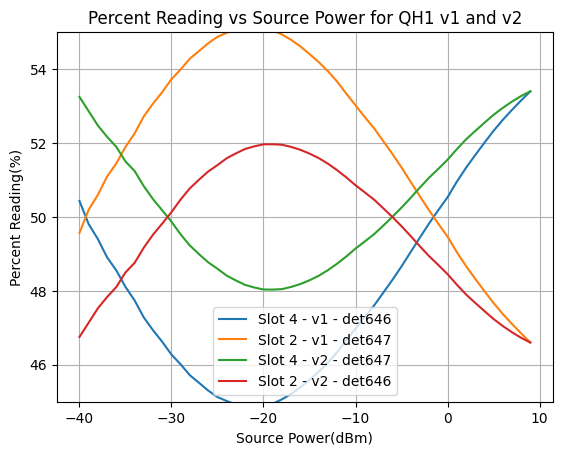

In [33]:
plt.plot(PWRvals,frac_1_4_v1,label='Slot 4 - v1 - det646')
plt.plot(PWRvals,frac_1_2_v1,label='Slot 2 - v1 - det647')
plt.plot(PWRvals,frac_1_4_v2,label='Slot 4 - v2 - det647')
plt.plot(PWRvals,frac_1_2_v2,label='Slot 2 - v2 - det646')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v1 and v2')
plt.ylim(45,55)
plt.legend()
plt.grid()

Could also be due to reflections off the detectors, will try to use circulators to fix this

## QH Phase Data, Two DMMs, Circulator

In [34]:
#maybe try setup with two hybrids constant phase shift and changing power
#v3 is same as v1 but with circulator
#v4 is same as v2 but with circulator

In [35]:
#v3

In [36]:
PWRvals, vals_1_4_v3, vals_1_2_v3 = QHRead('v3')

In [37]:
meanvals_1_4_v3 = np.array([1000*np.mean(valarray) for valarray in vals_1_4_v3]) #det646
meanvals_1_2_v3 = np.array([1000*np.mean(corrfunc(valarray)) for valarray in vals_1_2_v3]) #det647

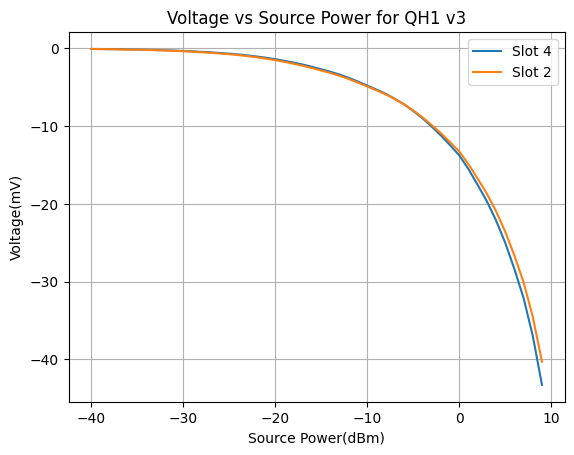

In [38]:
plt.plot(PWRvals,meanvals_1_4_v3,label='Slot 4')
plt.plot(PWRvals,meanvals_1_2_v3,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v3')
plt.legend()
plt.grid()

In [39]:
total_v3 = meanvals_1_4_v3 + meanvals_1_2_v3
frac_1_4_v3 = 100*meanvals_1_4_v3/total_v3
frac_1_2_v3 = 100*meanvals_1_2_v3/total_v3

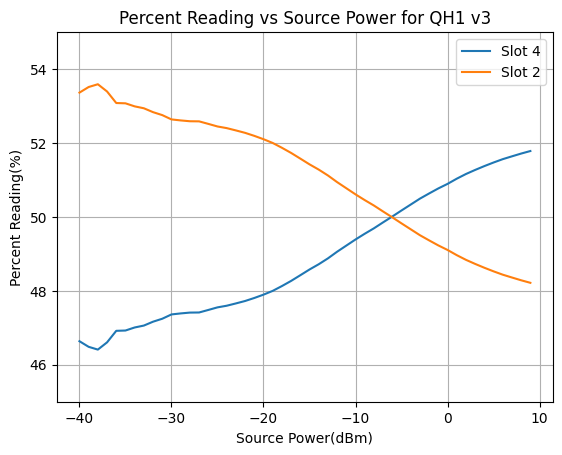

In [40]:
plt.plot(PWRvals,frac_1_4_v3,label='Slot 4')
plt.plot(PWRvals,frac_1_2_v3,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v3')
plt.ylim(45,55)
plt.legend()
plt.grid()

In [41]:
#v4

In [42]:
PWRvals, vals_1_4_v4, vals_1_2_v4 = QHRead('v4')

In [43]:
meanvals_1_4_v4 = np.array([1000*np.mean(corrfunc(valarray)) for valarray in vals_1_4_v4]) #det647
meanvals_1_2_v4 = np.array([1000*np.mean(valarray) for valarray in vals_1_2_v4]) #det646

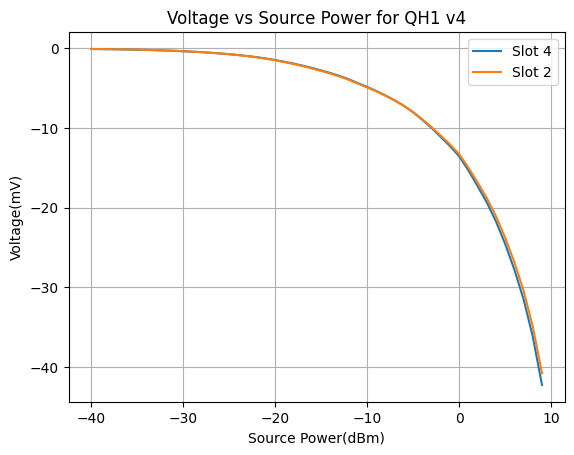

In [44]:
plt.plot(PWRvals,meanvals_1_4_v4,label='Slot 4')
plt.plot(PWRvals,meanvals_1_2_v4,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v4')
plt.legend()
plt.grid()

In [45]:
total_v4 = meanvals_1_4_v4 + meanvals_1_2_v4
frac_1_4_v4 = 100*meanvals_1_4_v4/total_v4
frac_1_2_v4 = 100*meanvals_1_2_v4/total_v4

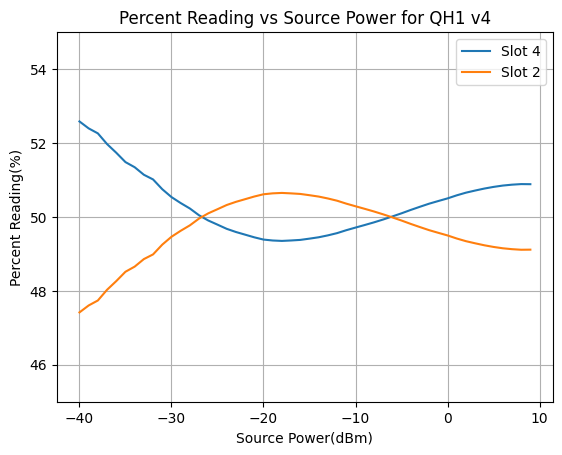

In [46]:
plt.plot(PWRvals,frac_1_4_v4,label='Slot 4')
plt.plot(PWRvals,frac_1_2_v4,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v4')
plt.ylim(45,55)
plt.legend()
plt.grid()

In [47]:
#Compare v3 and v4

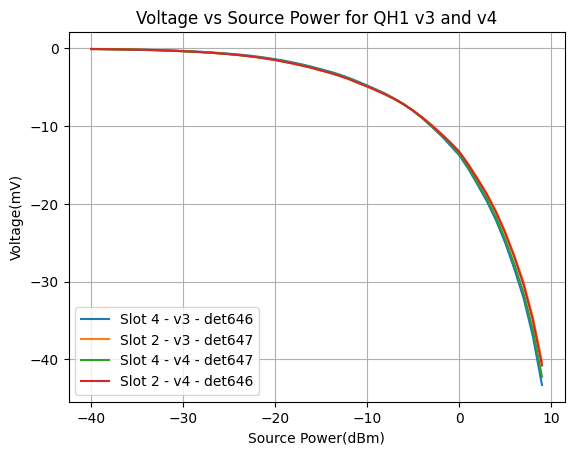

In [48]:
plt.plot(PWRvals,meanvals_1_4_v3,label='Slot 4 - v3 - det646')
plt.plot(PWRvals,meanvals_1_2_v3,label='Slot 2 - v3 - det647')
plt.plot(PWRvals,meanvals_1_4_v4,label='Slot 4 - v4 - det647')
plt.plot(PWRvals,meanvals_1_2_v4,label='Slot 2 - v4 - det646')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v3 and v4')
plt.legend()
plt.grid()

Similar issues are present, but v4 shows closer to 50-50, all also meet at same point

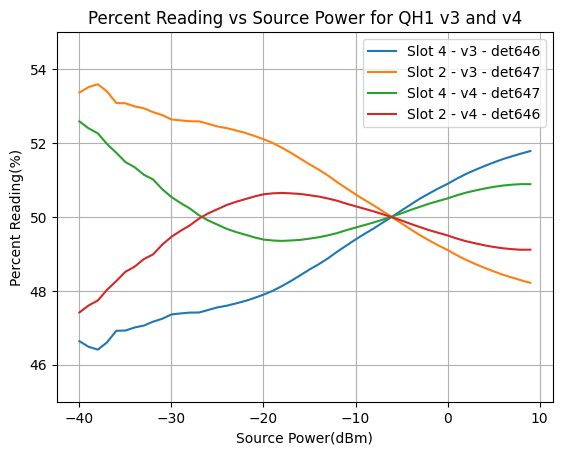

In [49]:
plt.plot(PWRvals,frac_1_4_v3,label='Slot 4 - v3 - det646')
plt.plot(PWRvals,frac_1_2_v3,label='Slot 2 - v3 - det647')
plt.plot(PWRvals,frac_1_4_v4,label='Slot 4 - v4 - det647')
plt.plot(PWRvals,frac_1_2_v4,label='Slot 2 - v4 - det646')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v3 and v4')
plt.ylim(45,55)
plt.legend()
plt.grid()

## QH Phase Data, Two DMMs, Attenuators

Attenuators are now tried to address the reflections

In [50]:
#Try attenuators for v5 and v6
#Test these setups for QH2
#Test setup with phase shifter

In [51]:
#v5 is same as v1 but with 10db attenuation
#v6 is same as v2 but with 10db attenuation

In [52]:
#v5

In [53]:
PWRvals, vals_1_4_v5, vals_1_2_v5 = QHRead('v5')

In [54]:
meanvals_1_4_v5 = np.array([1000*np.mean(valarray) for valarray in vals_1_4_v5]) #det646
meanvals_1_2_v5 = np.array([1000*np.mean(corrfunc(valarray)) for valarray in vals_1_2_v5]) #det647

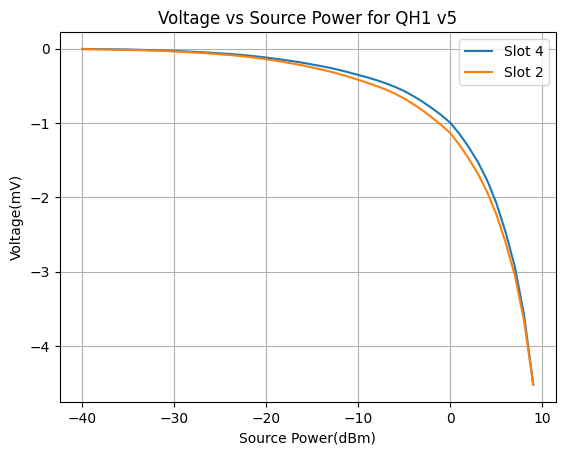

In [55]:
plt.plot(PWRvals,meanvals_1_4_v5,label='Slot 4')
plt.plot(PWRvals,meanvals_1_2_v5,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v5')
plt.legend()
plt.grid()

In [56]:
total_v5 = meanvals_1_4_v5 + meanvals_1_2_v5
frac_1_4_v5 = 100*meanvals_1_4_v5/total_v5
frac_1_2_v5 = 100*meanvals_1_2_v5/total_v5

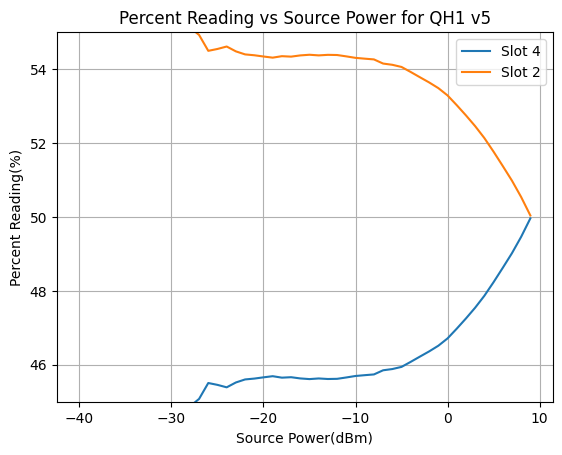

In [57]:
plt.plot(PWRvals,frac_1_4_v5,label='Slot 4')
plt.plot(PWRvals,frac_1_2_v5,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v5')
plt.ylim(45,55)
plt.legend()
plt.grid()

In [58]:
#v6

In [59]:
PWRvals, vals_1_4_v6, vals_1_2_v6 = QHRead('v6')

In [60]:
meanvals_1_4_v6 = np.array([1000*np.mean(corrfunc(valarray)) for valarray in vals_1_4_v6]) #det647
meanvals_1_2_v6 = np.array([1000*np.mean(valarray) for valarray in vals_1_2_v6]) #det646

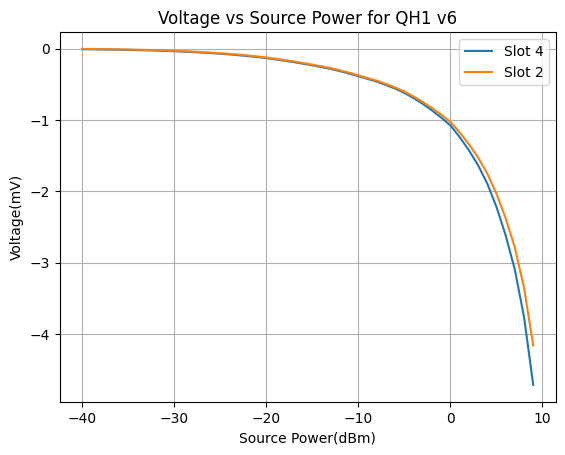

In [61]:
plt.plot(PWRvals,meanvals_1_4_v6,label='Slot 4')
plt.plot(PWRvals,meanvals_1_2_v6,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v6')
plt.legend()
plt.grid()

In [62]:
total_v6 = meanvals_1_4_v6 + meanvals_1_2_v6
frac_1_4_v6 = 100*meanvals_1_4_v6/total_v6
frac_1_2_v6 = 100*meanvals_1_2_v6/total_v6

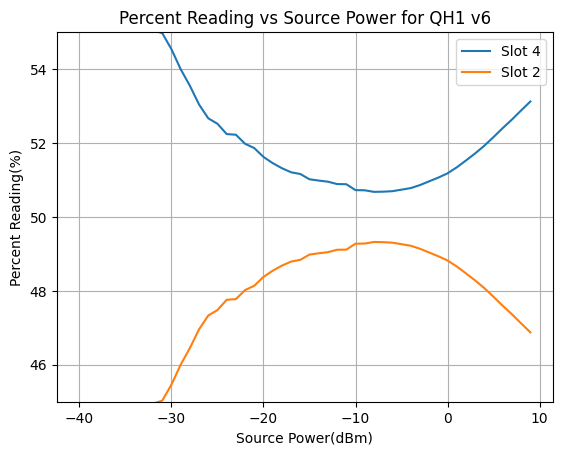

In [63]:
plt.plot(PWRvals,frac_1_4_v6,label='Slot 4')
plt.plot(PWRvals,frac_1_2_v6,label='Slot 2')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v6')
plt.ylim(45,55)
plt.legend()
plt.grid()

In [64]:
#Compare v5 and v6

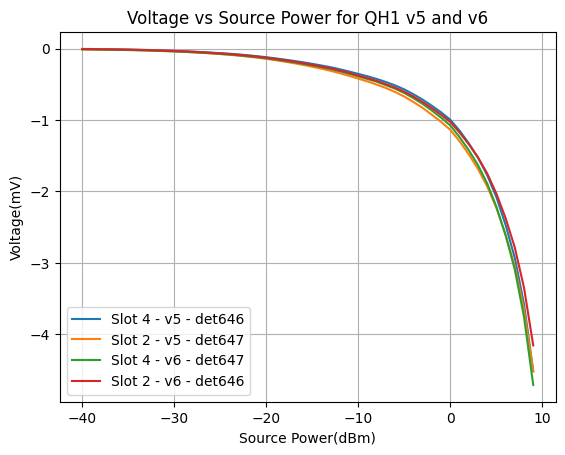

In [65]:
plt.plot(PWRvals,meanvals_1_4_v5,label='Slot 4 - v5 - det646')
plt.plot(PWRvals,meanvals_1_2_v5,label='Slot 2 - v5 - det647')
plt.plot(PWRvals,meanvals_1_4_v6,label='Slot 4 - v6 - det647')
plt.plot(PWRvals,meanvals_1_2_v6,label='Slot 2 - v6 - det646')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power for QH1 v5 and v6')
plt.legend()
plt.grid()

The attenuators do not work very well for our purposes

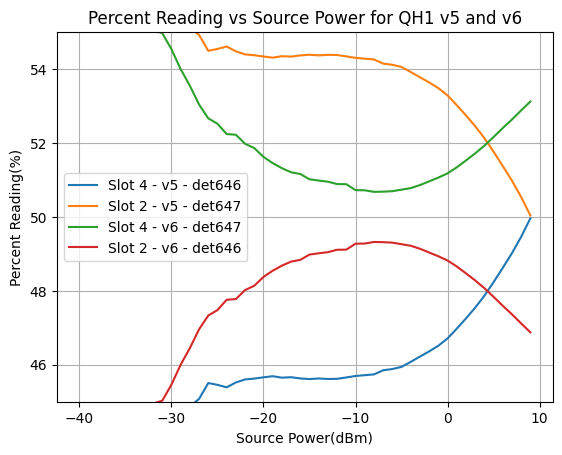

In [66]:
plt.plot(PWRvals,frac_1_4_v5,label='Slot 4 - v5 - det646')
plt.plot(PWRvals,frac_1_2_v5,label='Slot 2 - v5 - det647')
plt.plot(PWRvals,frac_1_4_v6,label='Slot 4 - v6 - det647')
plt.plot(PWRvals,frac_1_2_v6,label='Slot 2 - v6 - det646')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Percent Reading(%)')
plt.title('Percent Reading vs Source Power for QH1 v5 and v6')
plt.ylim(45,55)
plt.legend()
plt.grid()

## Detector Power Curve and Reliability

The source is once again plugged directly into the detector, and the source output power is swept multiple times

In [67]:
#Sweeps for 646 detector

In [68]:
def detRead(ver: str, PWRvals: np.ndarray, detnum = '646', sweepnum='1'):
  Keithfile = detnum + 'Sweep' + sweepnum + '_' + ver + '.csv'
  Keithvals = GetKeithly(Keithfile)
  detvals = []
  for i in range(1,51): #Fix
    detvals.append(Keithvals[(i-1)*1000:i*1000])
  return detvals

In [69]:
PWRvals = np.arange(-40,10,1)
det646v1 = np.array([1000*np.mean(valarray) for valarray in detRead('v1',PWRvals)])
det646v2 = np.array([1000*np.mean(valarray) for valarray in detRead('v2',PWRvals)])
det646v3 = np.array([1000*np.mean(valarray) for valarray in detRead('v3',PWRvals)])

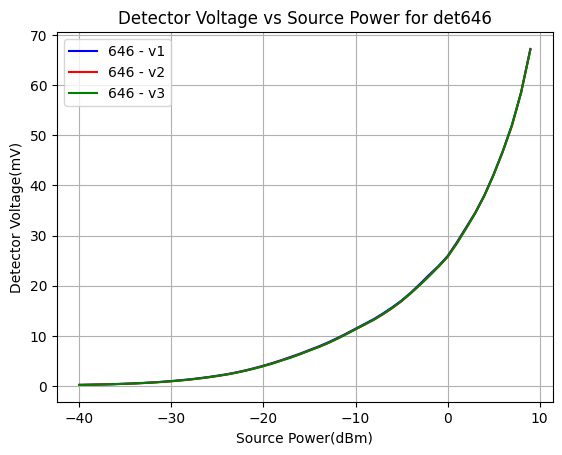

In [70]:
plt.plot(PWRvals, np.abs(det646v1),'-b',label='646 - v1')
plt.plot(PWRvals, np.abs(det646v2),'-r',label='646 - v2')
plt.plot(PWRvals, np.abs(det646v3),'-g',label='646 - v3')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Detector Voltage(mV)')
plt.title('Detector Voltage vs Source Power for det646')
plt.legend()
plt.grid()

This shows the percent error between trials

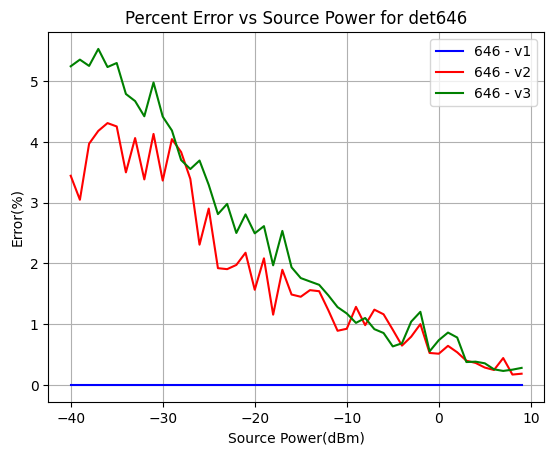

In [71]:
plt.plot(PWRvals, np.abs(100*(det646v1-det646v1)/det646v1),'-b',label='646 - v1')
plt.plot(PWRvals, np.abs(100*(det646v2-det646v1)/det646v1),'-r',label='646 - v2')
plt.plot(PWRvals, np.abs(100*(det646v3-det646v1)/det646v1),'-g',label='646 - v3')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Error(%)')
plt.title('Percent Error vs Source Power for det646')
plt.legend()
plt.grid()

The same experiment is repeated, but the microwaves are passed through the QH, one input and one output used

In [72]:
#QH passthrough

In [73]:
def PassthroughRead(ver: str, PWRvals: np.ndarray):
  Keithfile = 'QHPassthrough' + ver + '.csv'
  Keithvals = GetKeithly(Keithfile)
  Passvals = []
  for i in range(1,51): #Fix
    Passvals.append(Keithvals[(i-1)*1000:i*1000])
  return Passvals

In [74]:
PWRvals = np.arange(-40,10,1)
QHPassv1 = np.array([1000*np.mean(valarray) for valarray in PassthroughRead('v1',PWRvals)])
QHPassv2 = np.array([1000*np.mean(valarray) for valarray in PassthroughRead('v2',PWRvals)])
QHPassv3 = np.array([1000*np.mean(valarray) for valarray in PassthroughRead('v3',PWRvals)])

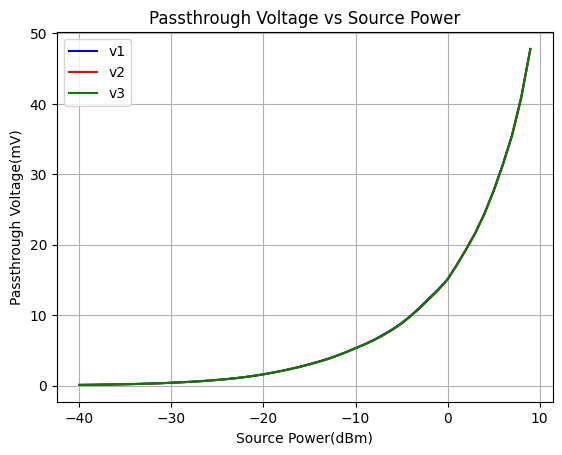

In [75]:
plt.plot(PWRvals, np.abs(QHPassv1),'-b',label='v1')
plt.plot(PWRvals, np.abs(QHPassv2),'-r',label='v2')
plt.plot(PWRvals, np.abs(QHPassv3),'-g',label='v3')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Passthrough Voltage(mV)')
plt.title('Passthrough Voltage vs Source Power')
plt.legend()
plt.grid()

The error is less than before

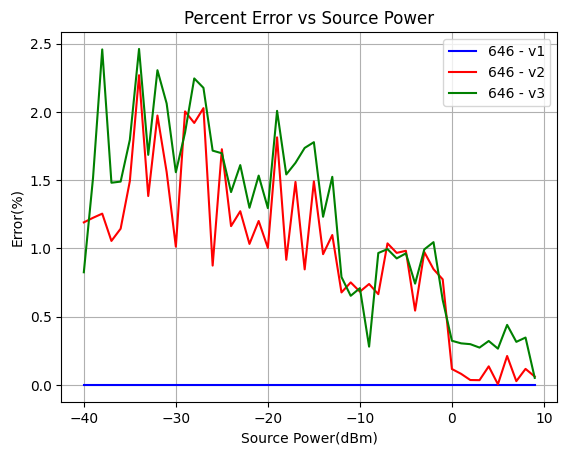

In [76]:
plt.plot(PWRvals, np.abs(100*(QHPassv1-QHPassv1)/QHPassv1),'-b',label='646 - v1')
plt.plot(PWRvals, np.abs(100*(QHPassv2-QHPassv1)/QHPassv1),'-r',label='646 - v2')
plt.plot(PWRvals, np.abs(100*(QHPassv3-QHPassv1)/QHPassv1),'-g',label='646 - v3')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Error(%)')
plt.title('Percent Error vs Source Power')
plt.legend()
plt.grid()

Passing the microwaved through the QH reduces their power

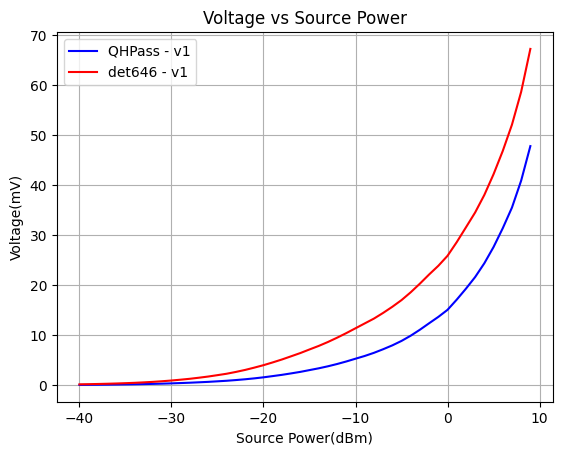

In [77]:
plt.plot(PWRvals, np.abs(QHPassv1),'-b',label='QHPass - v1')
plt.plot(PWRvals, np.abs(det646v1),'-r',label='det646 - v1')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power')
plt.legend()
plt.grid()

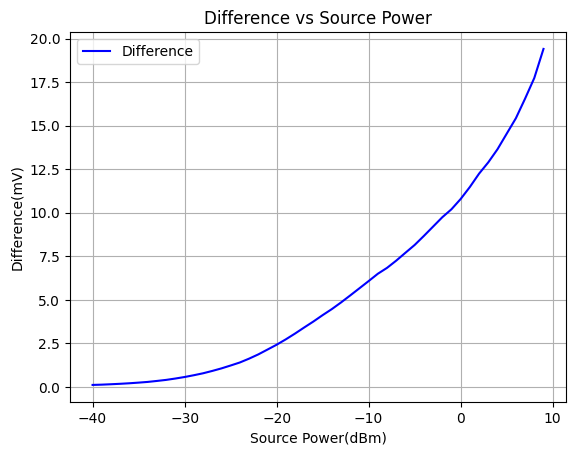

In [78]:
plt.plot(PWRvals, np.abs(det646v1) - np.abs(QHPassv1),'-b',label='Difference')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Difference(mV)')
plt.title('Difference vs Source Power')
plt.legend()
plt.grid()

The same experiment is done, but passing through a 2 way combiner this time

In [79]:
#Combine basic data

In [80]:
def CombineRead(ver: str, PWRvals: np.ndarray):
  Keithfile = 'Combine' + ver + '.csv'
  Keithvals = GetKeithly(Keithfile)
  Combvals = []
  for i in range(1,51): #Fix
    Combvals.append(Keithvals[(i-1)*1000:i*1000])
  return Combvals

In [81]:
PWRvals = np.arange(-40,10,1)
Combv1 = np.array([1000*np.mean(valarray) for valarray in CombineRead('v1',PWRvals)])
Combv2 = np.array([1000*np.mean(valarray) for valarray in CombineRead('v2',PWRvals)])
Combv3 = np.array([1000*np.mean(valarray) for valarray in CombineRead('v3',PWRvals)])

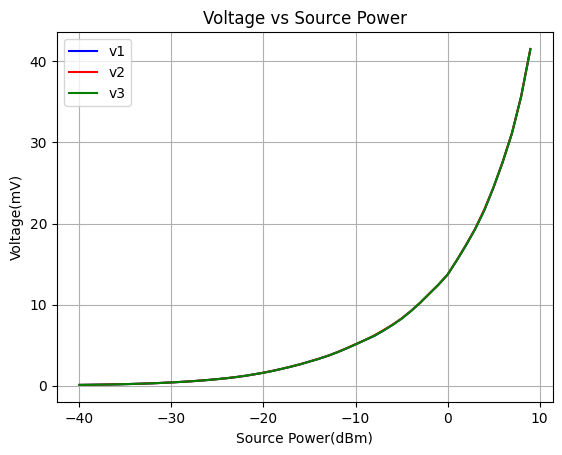

In [82]:
plt.plot(PWRvals, np.abs(Combv1),'-b',label='v1')
plt.plot(PWRvals, np.abs(Combv2),'-r',label='v2')
plt.plot(PWRvals, np.abs(Combv3),'-g',label='v3')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power')
plt.legend()
plt.grid()

The error is the lowest in this configuration

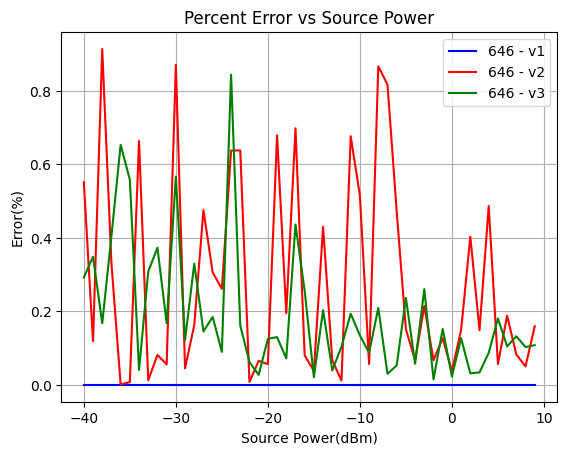

In [83]:
plt.plot(PWRvals, np.abs(100*(Combv1-Combv1)/Combv1),'-b',label='646 - v1')
plt.plot(PWRvals, np.abs(100*(Combv2-Combv1)/Combv1),'-r',label='646 - v2')
plt.plot(PWRvals, np.abs(100*(Combv3-Combv1)/Combv1),'-g',label='646 - v3')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Error(%)')
plt.title('Percent Error vs Source Power')
plt.legend()
plt.grid()

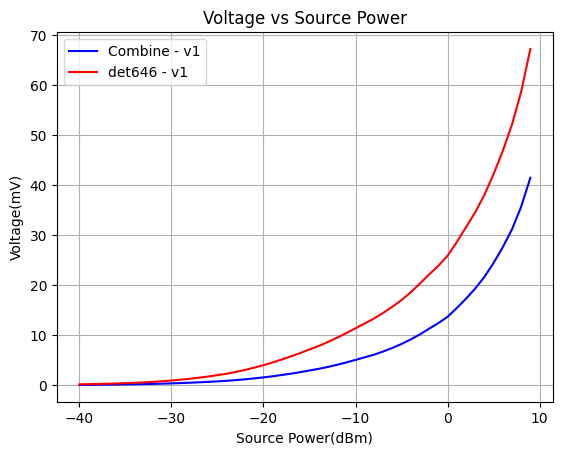

In [84]:
plt.plot(PWRvals, np.abs(Combv1),'-b',label='Combine - v1')
plt.plot(PWRvals, np.abs(det646v1),'-r',label='det646 - v1')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power')
plt.legend()
plt.grid()

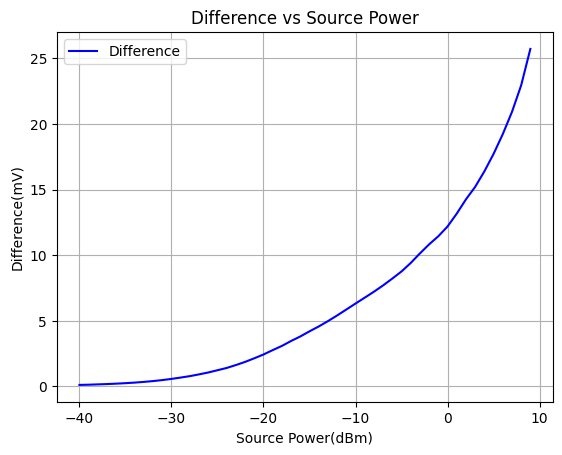

In [85]:
plt.plot(PWRvals, np.abs(det646v1) - np.abs(Combv1),'-b',label='Difference')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Difference(mV)')
plt.title('Difference vs Source Power')
plt.legend()
plt.grid()

In [86]:
#Overall

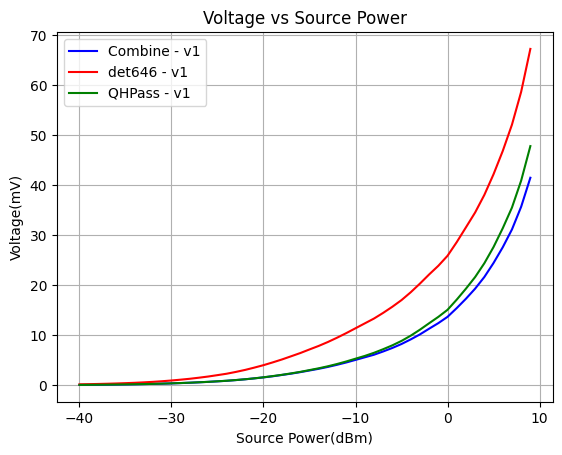

In [87]:
plt.plot(PWRvals, np.abs(Combv1),'-b',label='Combine - v1')
plt.plot(PWRvals, np.abs(det646v1),'-r',label='det646 - v1')
plt.plot(PWRvals, np.abs(QHPassv1),'-g',label='QHPass - v1')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage vs Source Power')
plt.legend()
plt.grid()

This plots the percent of source power that goes through (from detector voltage reading)

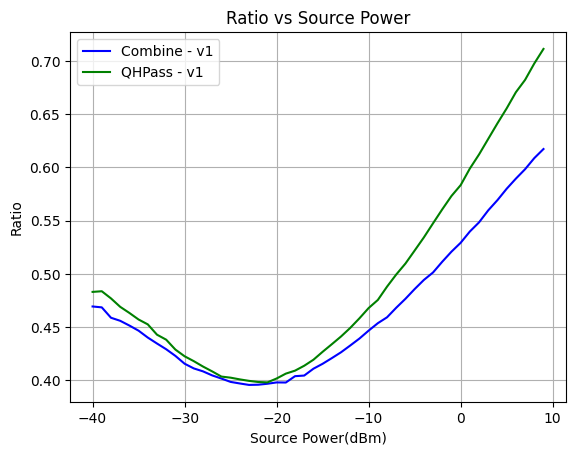

In [88]:
plt.plot(PWRvals, np.abs(Combv1)/np.abs(det646v1),'-b',label='Combine - v1')
plt.plot(PWRvals, np.abs(QHPassv1)/np.abs(det646v1),'-g',label='QHPass - v1')
plt.xlabel('Source Power(dBm)')
plt.ylabel('Ratio')
plt.title('Ratio vs Source Power')
plt.legend()
plt.grid()

## Functions 2

In [89]:
def SeriesDuration(ver: str, PWR: str):
  Filename = '646_' + PWR + '_' + 'TimeSeries' + ver + '.csv'
  t1 = GetKeithTimes(Filename)
  duration = (t1[-1]-t1[0])
  hours = duration//3600
  minutes = (duration%3600)//60
  seconds = duration%60
  print(f'{PWR}dBm {ver} lasted {round(hours)}hr {round(minutes)}min {round(seconds)}s')
  return duration

In [90]:
def SeriesRead(ver: str, PWR: str, detnum: str, machine: str, slice_size: int):
  Filename = detnum + '_' + PWR + '_' + 'TimeSeries' + ver + '.csv'
  if machine == 'Keithly':
    Series = GetKeithly(Filename)
  elif machine == 'Keysight':
    Series = GetKeysight(Filename)
  else:
    raise ValueError('Machine must be either Keithly or Keysight')
  n = len(Series)
  Sliced_Vals = []
  for i in range(0,n,slice_size):
    Sliced_Vals.append(1000*np.abs(Series[i:i+slice_size]))
  return Sliced_Vals

In [91]:
def UnitPrefix(val):
  prefixes = {9:'G', 6:'M', 3:'k', 0:'', -3:'m', -6:'μ', -9:'n'}
  exp1 = 3*(np.log10(val)//3)
  uscale = 10**exp1
  return prefixes[exp1], uscale

In [92]:
def SeriesPlot(ver: str, PWR: str, sampling_freq: int, Slice_Size: int, Scatter_Slice: int, n: int, aperture: float, figsize=(20,9), alpha=0.05, size=4, normalized=False, timescale='seconds'):
  if timescale == 'seconds':
    xscale = 1
    tlabel = 'Time(s)'
  elif timescale == 'minutes':
    xscale = 60
    tlabel = 'Time(min)'
  elif timescale == 'hours':
    xscale = 3600
    tlabel = 'Time(hr)'
  else:
    raise ValueError('timescale must be either seconds, minutes, or hours')

  S1a = np.array(SeriesRead(ver,PWR,'646','Keithly',Slice_Size))
  S2a = np.array(SeriesRead(ver,PWR,'647','Keysight',Slice_Size))
  Series_646 = np.array([np.mean(valarray) for valarray in S1a])
  Series_647 = np.array([np.mean(valarray) for valarray in S2a])
  total = Series_646 + Series_647
  frac646 = 100*Series_646/total
  frac647 = 100*Series_647/total

  S1s = np.array(SeriesRead(ver,PWR,'646','Keithly',Scatter_Slice))
  S2s = np.array(SeriesRead(ver,PWR,'647','Keysight',Scatter_Slice))
  sSeries_646 = np.array([np.mean(valarray) for valarray in S1s])
  sSeries_647 = np.array([np.mean(valarray) for valarray in S2s])
  stotal = sSeries_646 + sSeries_647
  sfrac646 = 100*sSeries_646/stotal
  sfrac647 = 100*sSeries_647/stotal

  xvals = np.arange(0,n,Slice_Size)/(sampling_freq*xscale)
  xvals_scatter = np.arange(0,n,Scatter_Slice)/(sampling_freq*xscale)

  if normalized:
    norm = 100/stotal.max()
  else:
    norm = 1

  normdict = {True:'Is Normalized', False:'Is Not Normalized'}

  total = total*norm
  Series_646 = Series_646*norm
  Series_647 = Series_647*norm

  stotal = stotal*norm
  sSeries_646 = sSeries_646*norm
  sSeries_647 = sSeries_647*norm

  bound1 = np.array([sSeries_646,sSeries_647])
  bound2 = np.array([sfrac646,sfrac647])
  bound3 = stotal

  fig1 = plt.figure(figsize=(20,9))
  alpha1 = 0.05
  size1 = 4

  prefix, uscale = UnitPrefix(aperture)

  print(f'There are {n} Points In Total')
  print(f'The Sampling Rate is {sampling_freq}Hz')
  print(f'Aperture is {int(aperture//uscale)} {prefix}s')
  print(f'Line Plots Averaging Every {Slice_Size} Points')
  print(f'Scatter Plots Averaging Every {Scatter_Slice} Points')
  print(f'Timescale units are {timescale}')
  print(f'Signal {normdict[normalized]}')
  print('')

  plt.subplot(2, 3, 1)
  plt.plot(xvals,Series_646,'-b',label=f'det646: {PWR}dBm')
  plt.plot(xvals,Series_647,'-r',label=f'det647: {PWR}dBm')
  plt.scatter([0,0],[bound1.min(),bound1.max()],alpha=0)
  plt.xlabel(tlabel); plt.ylabel('Detector Voltage(mV)')
  plt.title(f'Detector Voltage vs Time for {PWR}dBm')
  plt.legend(); plt.grid()

  plt.subplot(2, 3, 2)
  plt.plot(xvals,frac646,'-b',label=f'det646: {PWR}dBm')
  plt.plot(xvals,frac647,'-r',label=f'det647: {PWR}dBm')
  plt.scatter([0,0],[bound2.min(),bound2.max()],alpha=0)
  plt.xlabel(tlabel); plt.ylabel('Power Fraction')
  plt.title(f'Power Fraction vs Time for {PWR}dBm')
  plt.legend(); plt.grid()

  plt.subplot(2, 3, 3)
  plt.plot(xvals,total,'-g',label=f'Total: {PWR}dBm')
  plt.scatter([0,0],[bound3.min(),bound3.max()],alpha=0)
  plt.xlabel(tlabel); plt.ylabel('Total Power')
  plt.title(f'Total Power vs Time for {PWR}dBm')
  plt.legend(); plt.grid()

  plt.subplot(2, 3, 4)
  plt.scatter(xvals_scatter,sSeries_646,c='b',s=size,alpha=alpha)
  plt.scatter(xvals_scatter,sSeries_647,c='r',s=size,alpha=alpha)
  plt.plot([],[],'.b',label=f'det646: {PWR}dBm'); plt.plot([],[],'.r',label=f'det647: {PWR}dBm')
  plt.xlabel(tlabel); plt.ylabel('Detector Voltage(mV)')
  plt.title(f'Detector Voltage vs Time for {PWR}dBm')
  plt.legend(); plt.grid()

  plt.subplot(2, 3, 5)
  plt.scatter(xvals_scatter,sfrac646,c='b',s=size,alpha=alpha)
  plt.scatter(xvals_scatter,sfrac647,c='r',s=size,alpha=alpha)
  plt.plot([],[],'.b',label=f'det646: {PWR}dBm'); plt.plot([],[],'.r',label=f'det647: {PWR}dBm')
  plt.xlabel(tlabel); plt.ylabel('Power Fraction')
  plt.title(f'Power Fraction vs Time for {PWR}dBm')
  plt.legend(); plt.grid()

  plt.subplot(2, 3, 6)
  plt.scatter(xvals_scatter,stotal,c='g',s=size,alpha=alpha)
  plt.plot([],[],'.g',label=f'Total: {PWR}dBm')
  plt.xlabel(tlabel); plt.ylabel('Total Power')
  plt.title(f'Total Power vs Time for {PWR}dBm')
  plt.legend(); plt.grid()

  plt.tight_layout()

  return

## 2 Way Splitter Data

The source is plugged directly into a 2way splitter, and two detectors are plugged into each output slot, with their voltages being sampled over time

In [93]:
#500us aperture, 50hz sampling, 50kmax, 2way splitter, Source A, Source Power Change
#-40dBm v1 start 14:17 7/09
#-30dBm v1 start 14:40 7/09
#-20dBm v1 start 09:56 7/10
#-10dBm v1 start 10:15 7/10
#+00dBm v1 start 10:36 7/10
#+10dBm v1 start 10:48 7/10
#+20dBm v1 start 11:19 7/10

In [94]:
d1 = SeriesDuration('v1','-40')
d2 = SeriesDuration('v1','-30')
d3 = SeriesDuration('v1','-20')
d4 = SeriesDuration('v1','-10')
d5 = SeriesDuration('v1','+00')
d6 = SeriesDuration('v1','+10')
d7 = SeriesDuration('v1','+20')

-40dBm v1 lasted 0hr 16min 48s
-30dBm v1 lasted 0hr 16min 50s
-20dBm v1 lasted 0hr 16min 49s
-10dBm v1 lasted 0hr 16min 50s
+00dBm v1 lasted 0hr 16min 51s
+10dBm v1 lasted 0hr 16min 51s
+20dBm v1 lasted 0hr 16min 51s


In [95]:
Normv1 = True

This plots show the evolution of the splitters distribution and source total power over time

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



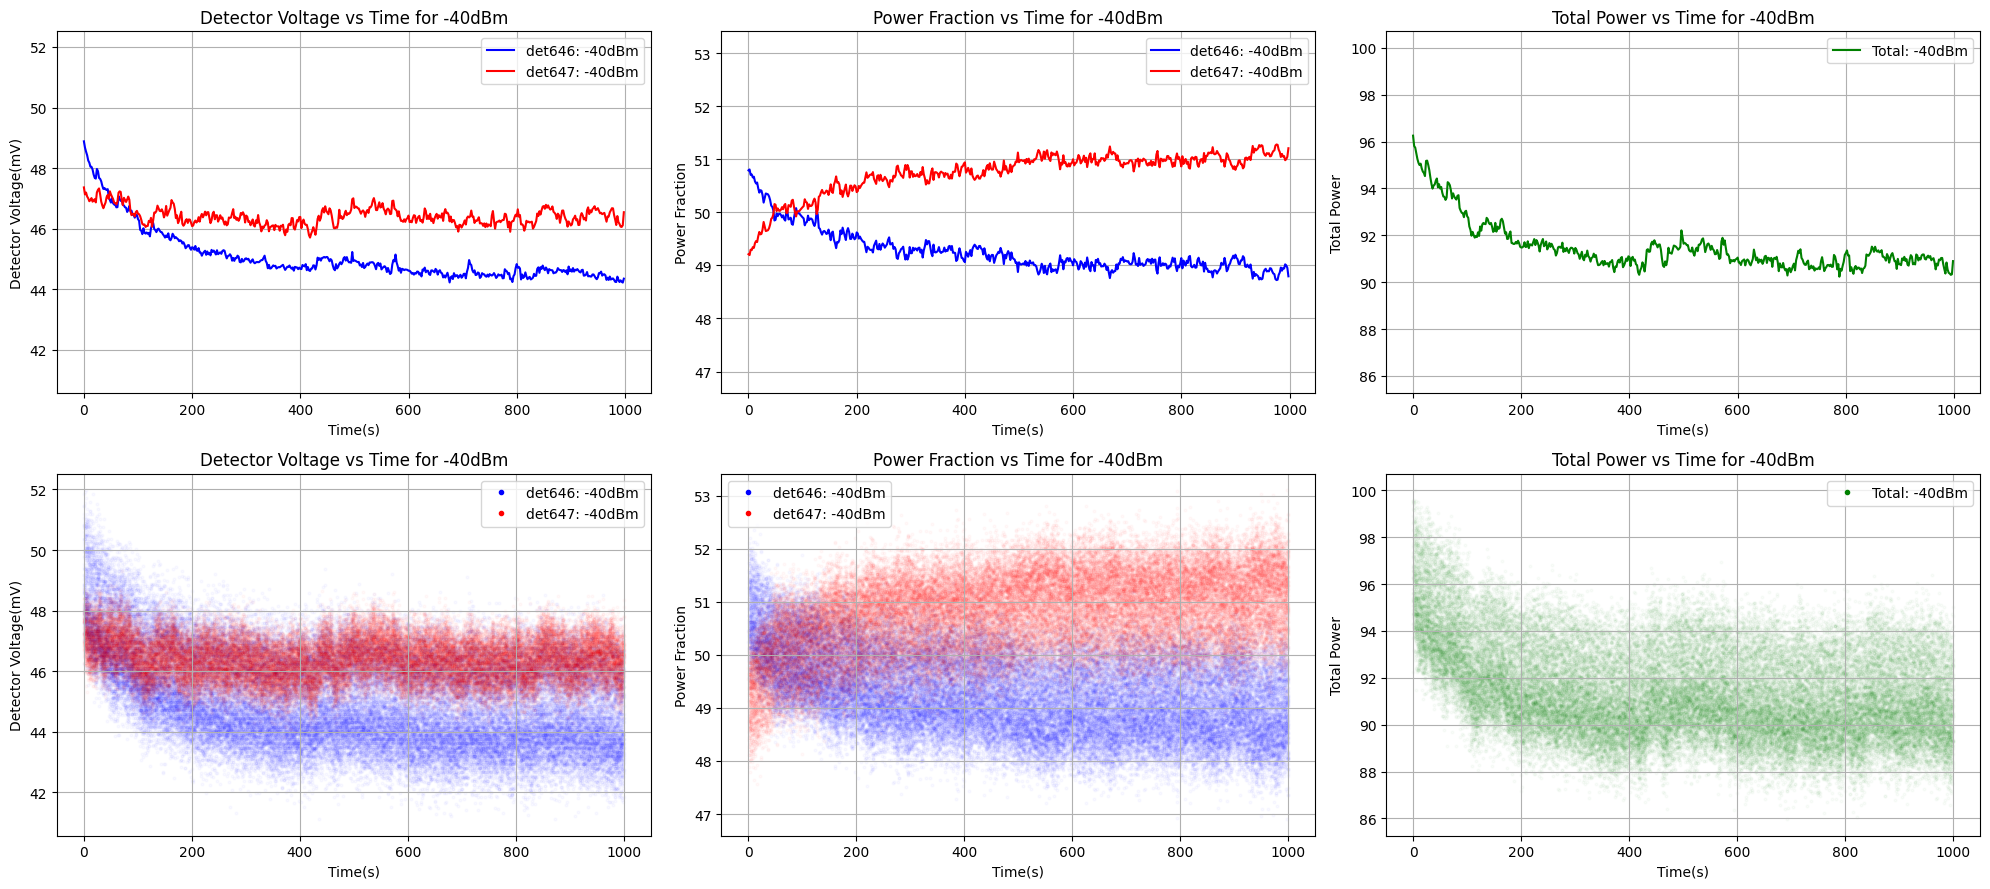

In [96]:
SeriesPlot(ver='v1', PWR='-40', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



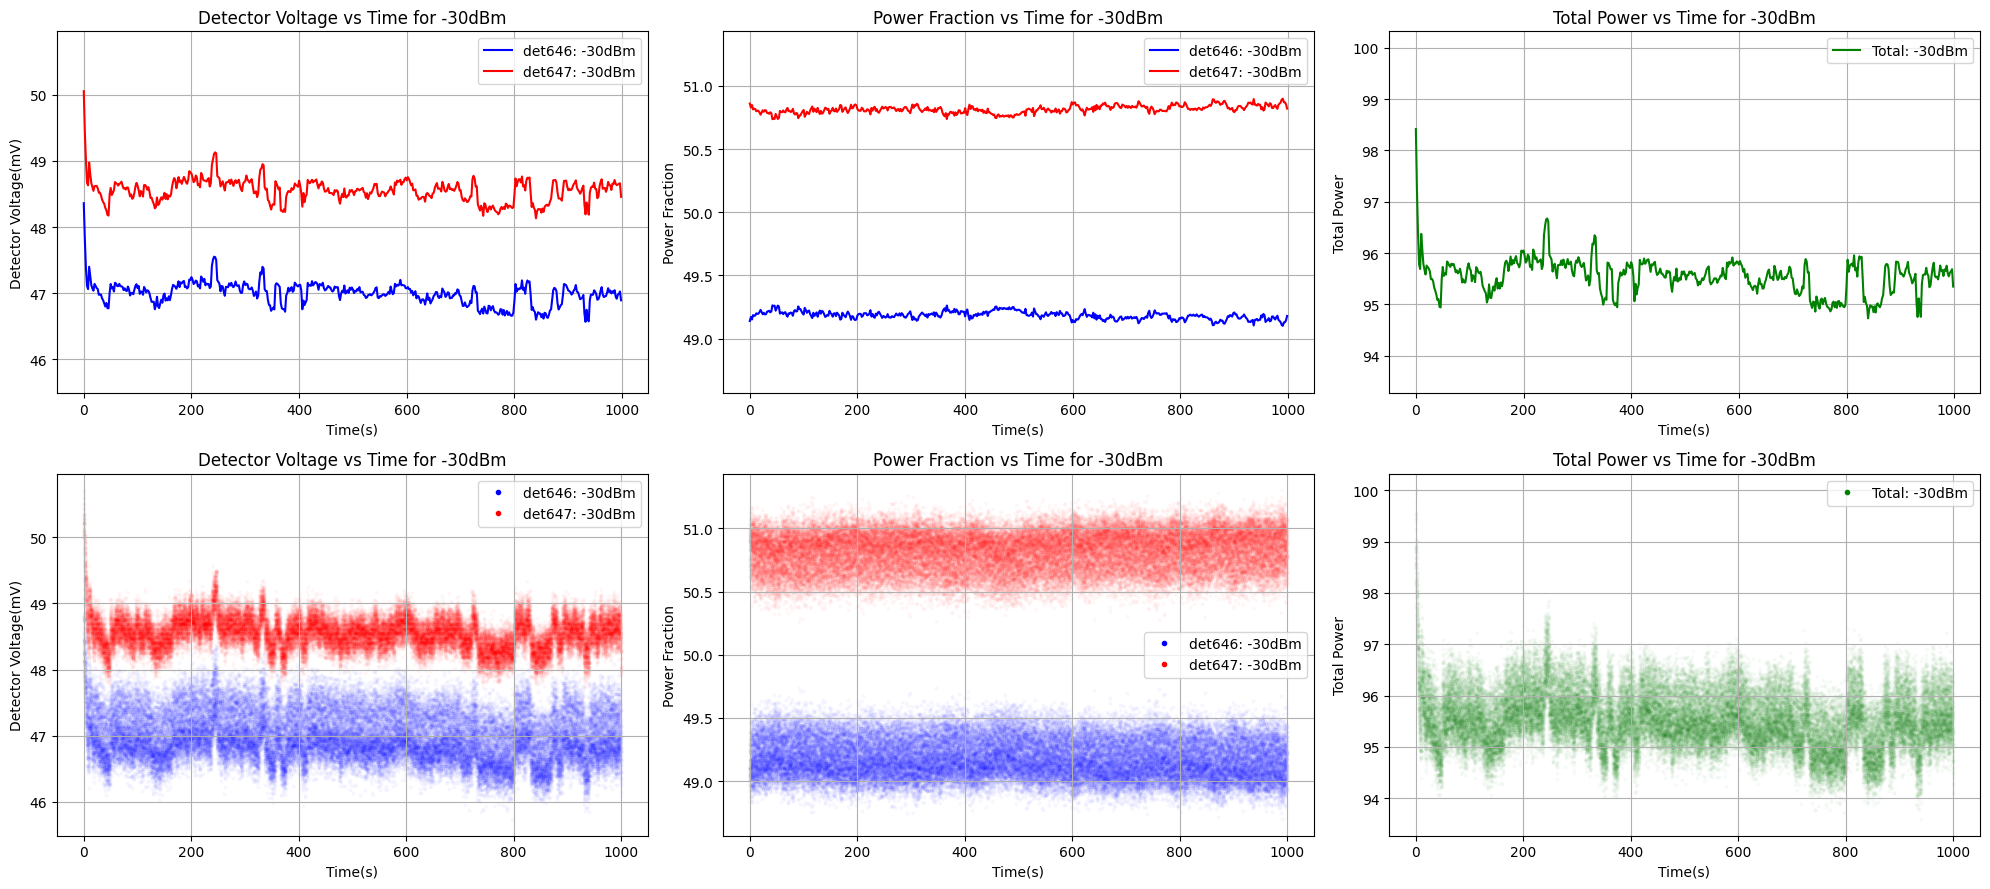

In [97]:
SeriesPlot(ver='v1', PWR='-30', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



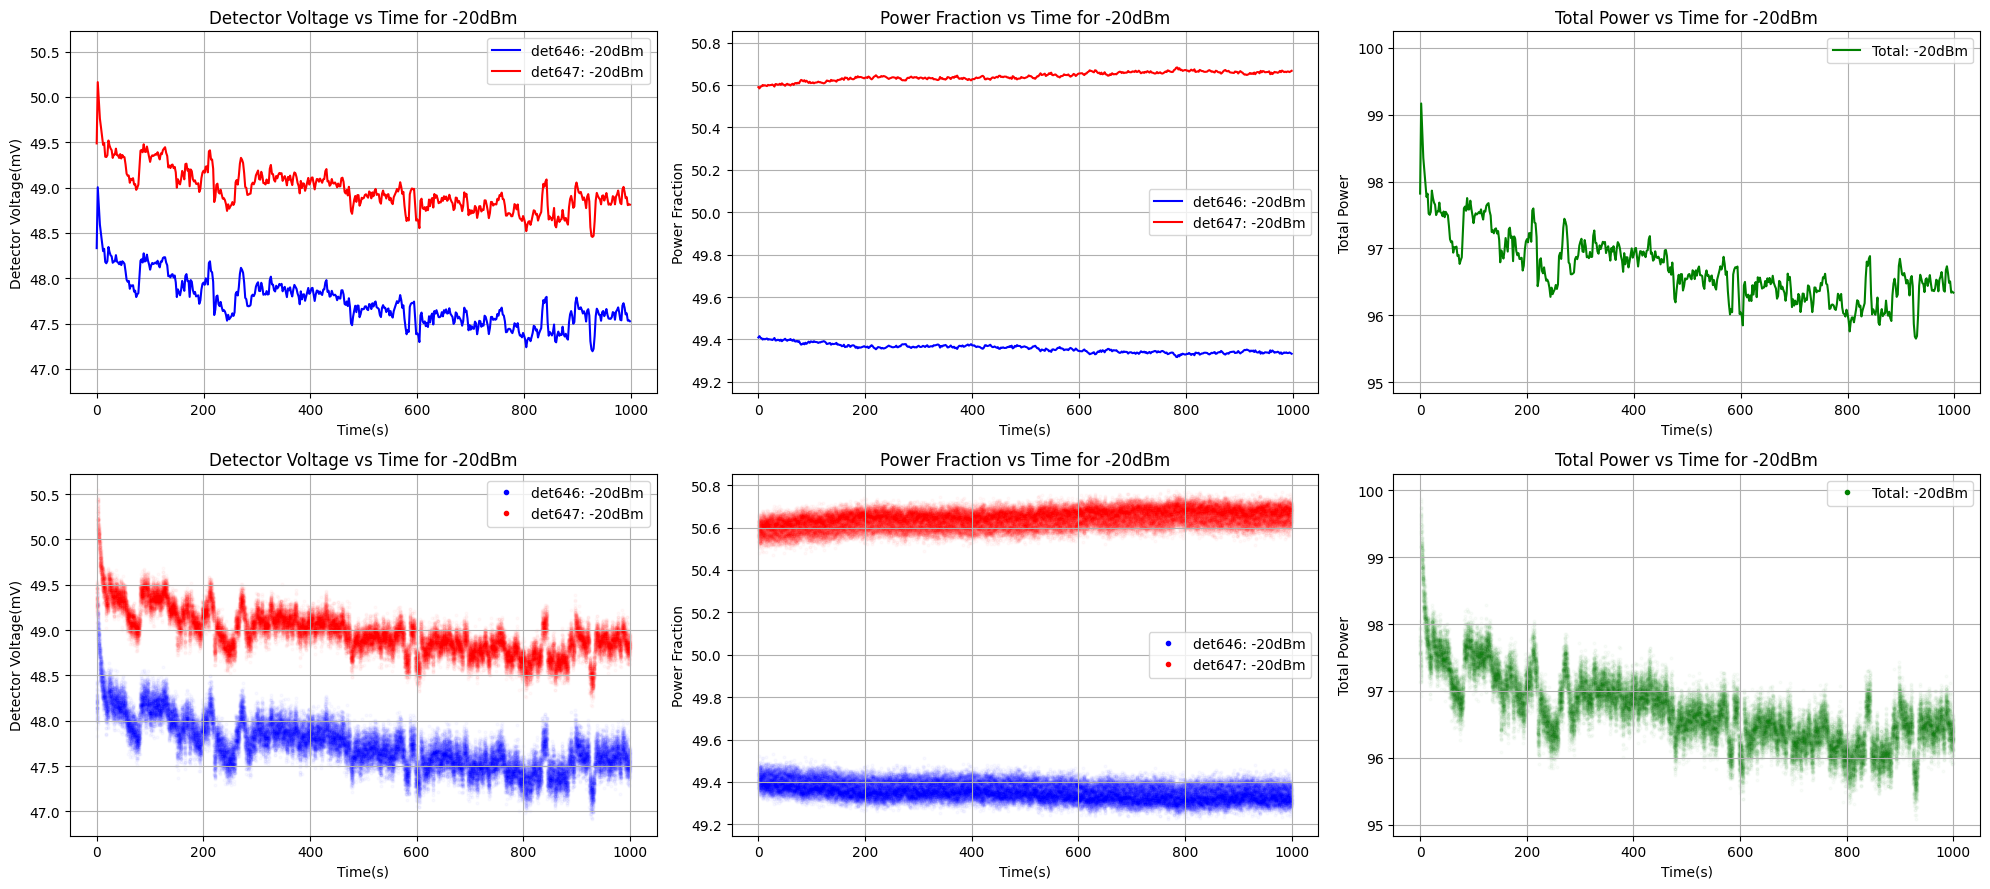

In [98]:
SeriesPlot(ver='v1', PWR='-20', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



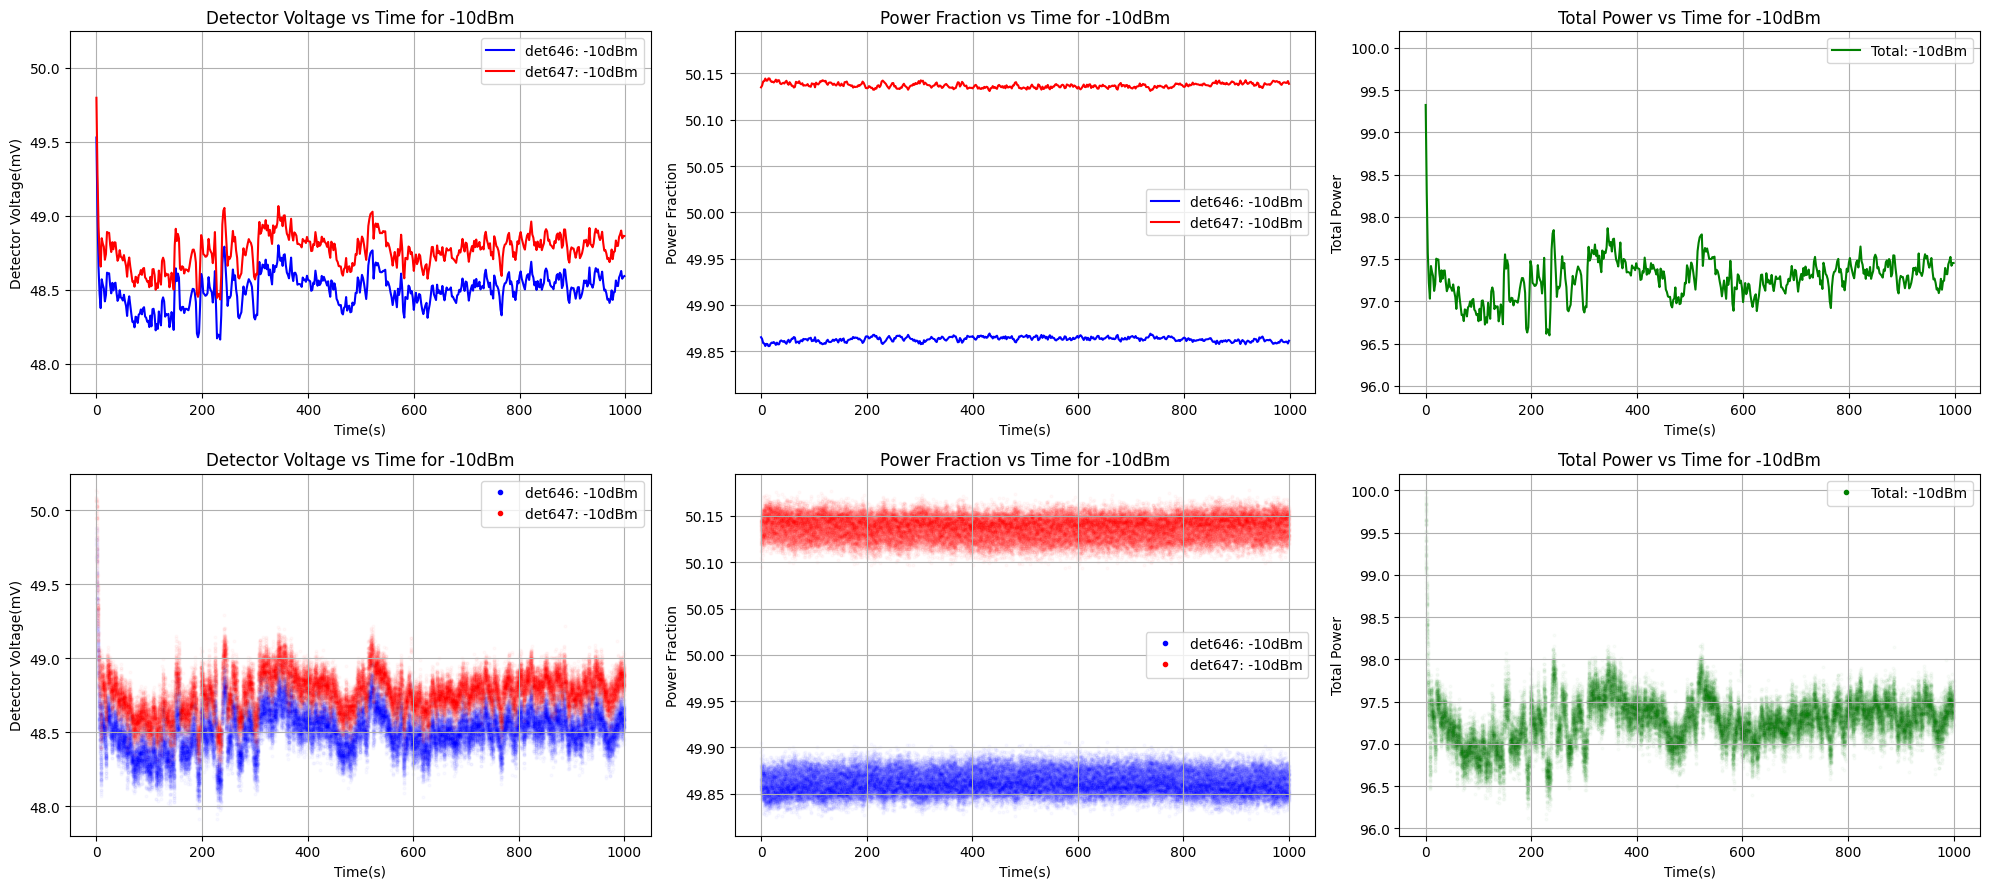

In [99]:
SeriesPlot(ver='v1', PWR='-10', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



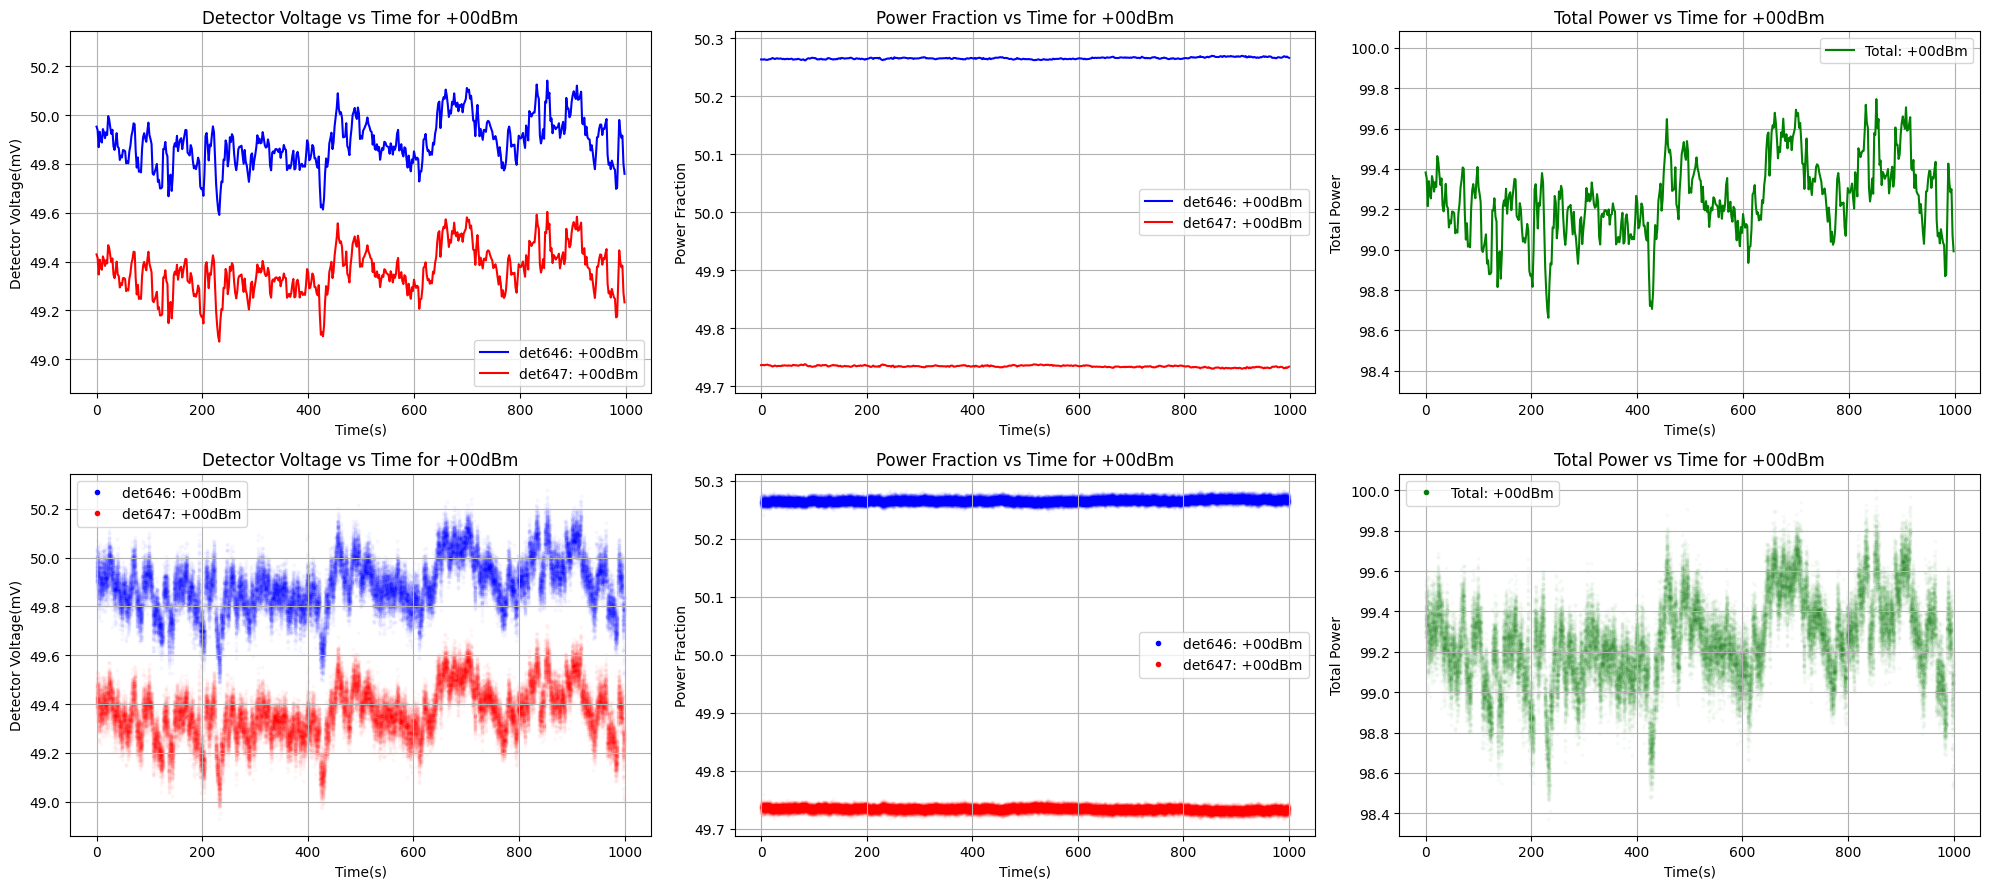

In [100]:
SeriesPlot(ver='v1', PWR='+00', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



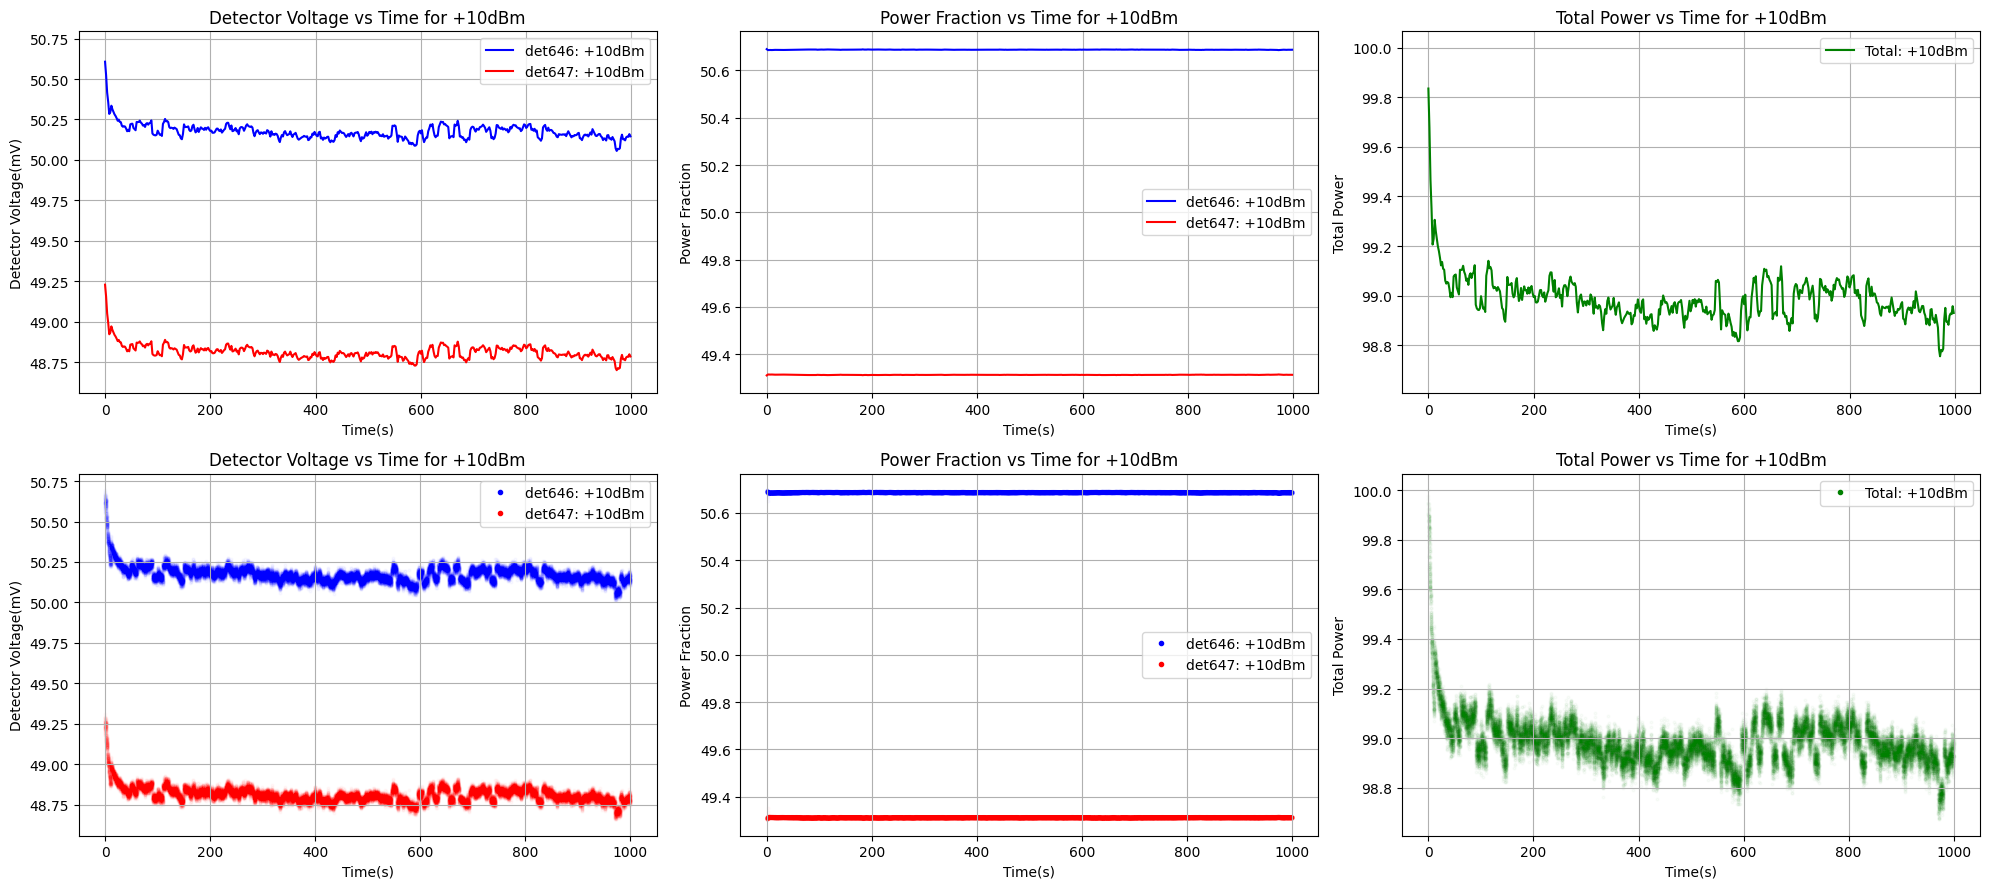

In [101]:
SeriesPlot(ver='v1', PWR='+10', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



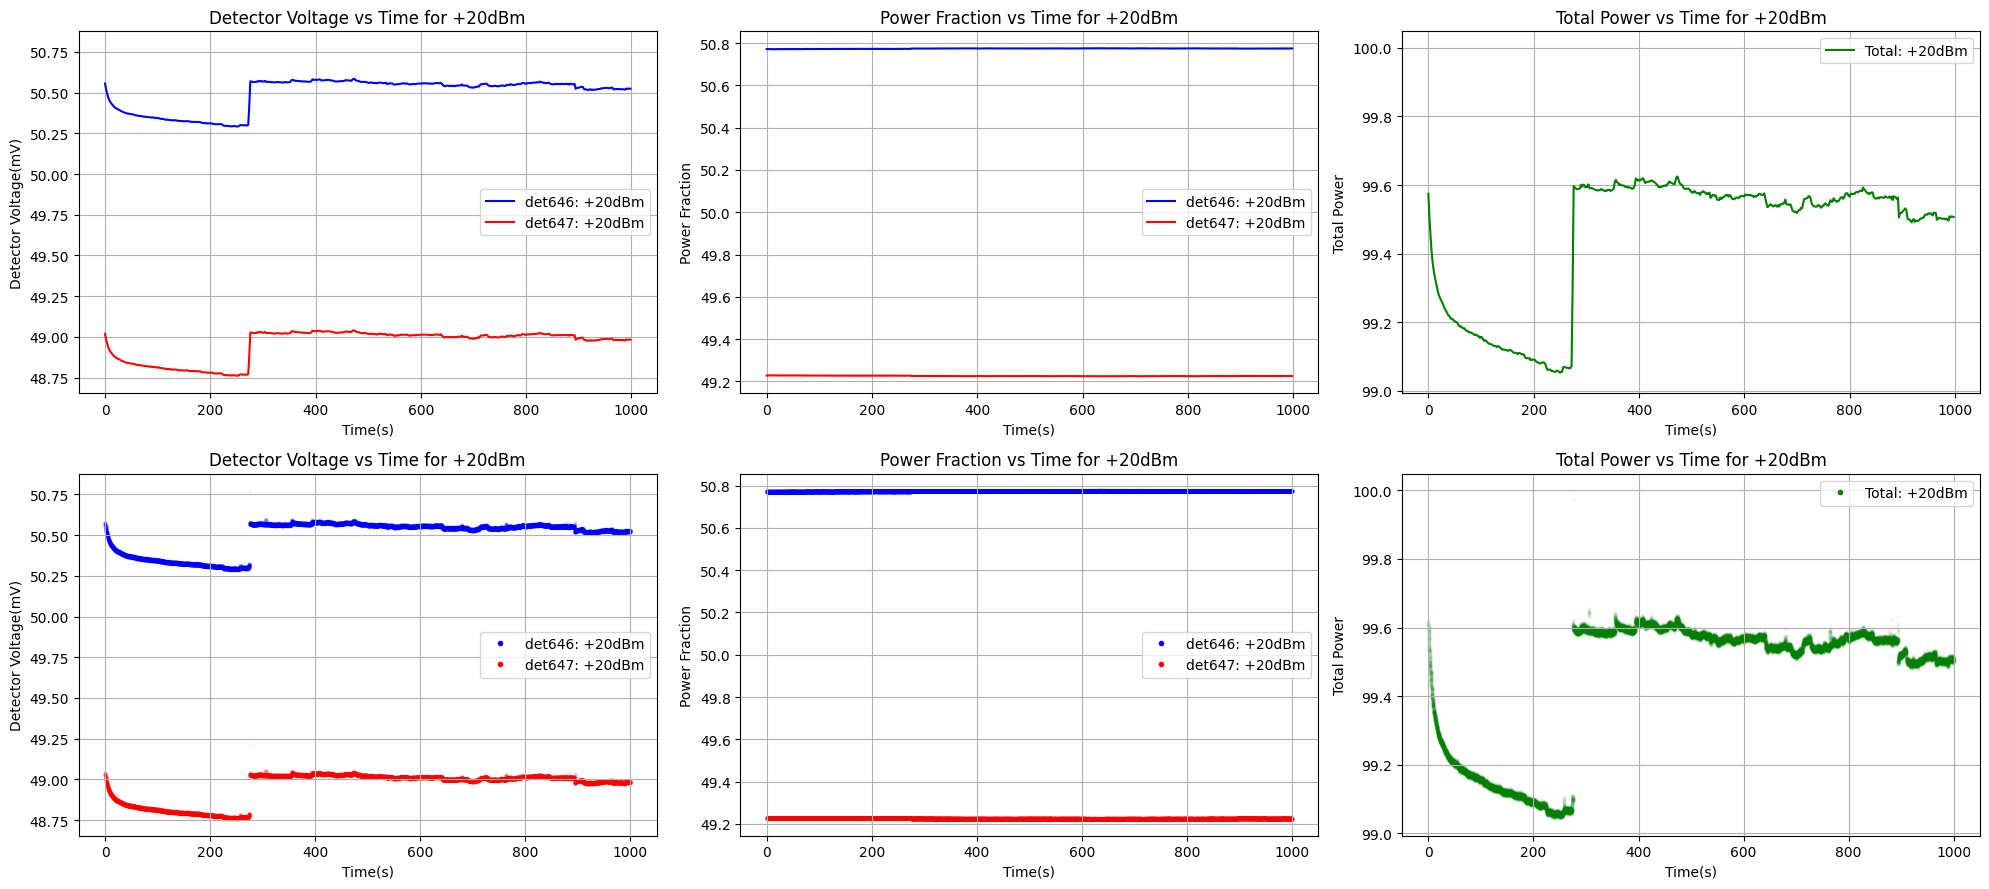

In [102]:
SeriesPlot(ver='v1', PWR='+20', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)
#Retake?

As the source power value goes up, the stability of the distrinution of power as well as the total power increases.

## 2 Way Splitter Data, Attenuation

The same experiment is run, but the source is set to +20dBm for all trials and varying attenuators are plugged in between the source and the splitter (listed power is +20dBm - attenuation)

In [103]:
#Source Power Constant +20dBm, vary attenuation
#Attenuators from source:
#-10dBm v2 start 12:37 7/10
#+00dBm v2 start 13:27 7/10

In [104]:
#d1 = SeriesDuration('v2','-40')
#d2 = SeriesDuration('v2','-30')
#d3 = SeriesDuration('v2','-20')
d4 = SeriesDuration('v2','-10')
d5 = SeriesDuration('v2','+00')
#d6 = SeriesDuration('v2','+10')
#d7 = SeriesDuration('v2','+20')

-10dBm v2 lasted 0hr 16min 52s
+00dBm v2 lasted 0hr 16min 51s


In [105]:
Normv2 = False

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



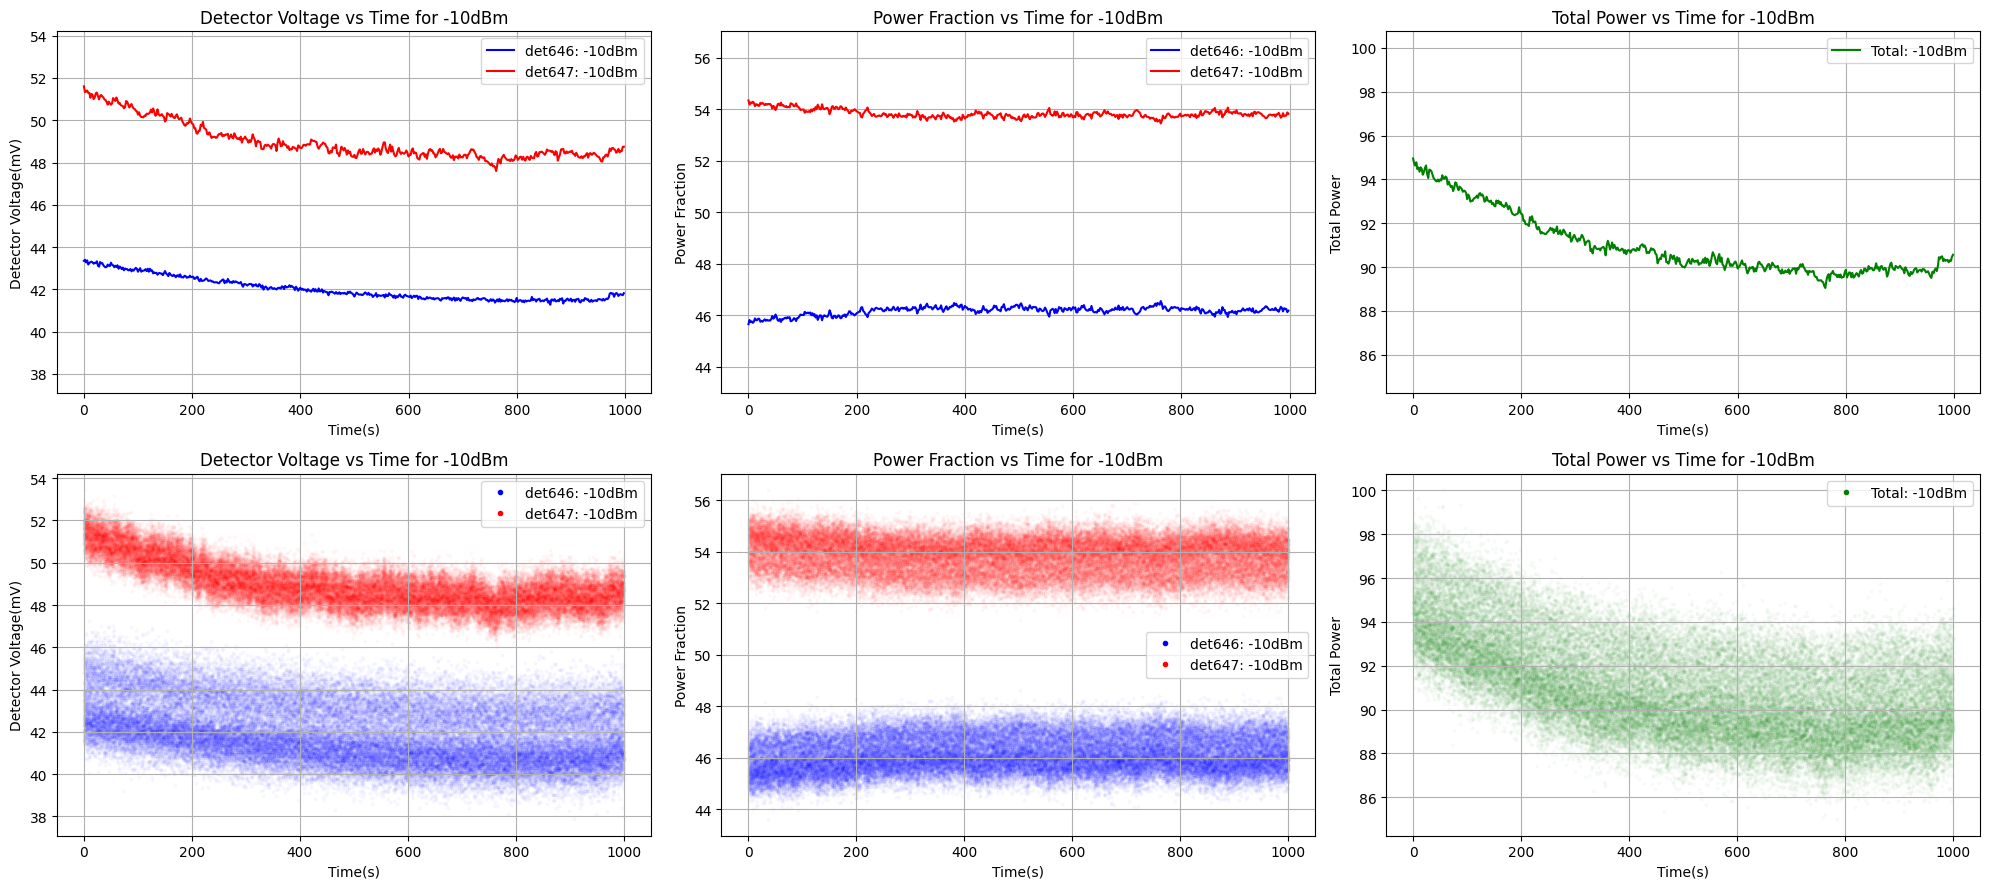

In [106]:
SeriesPlot(ver='v2', PWR='-10', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

There are 50000 Points In Total
The Sampling Rate is 50Hz
Aperture is 500 μs
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are seconds
Signal Is Normalized



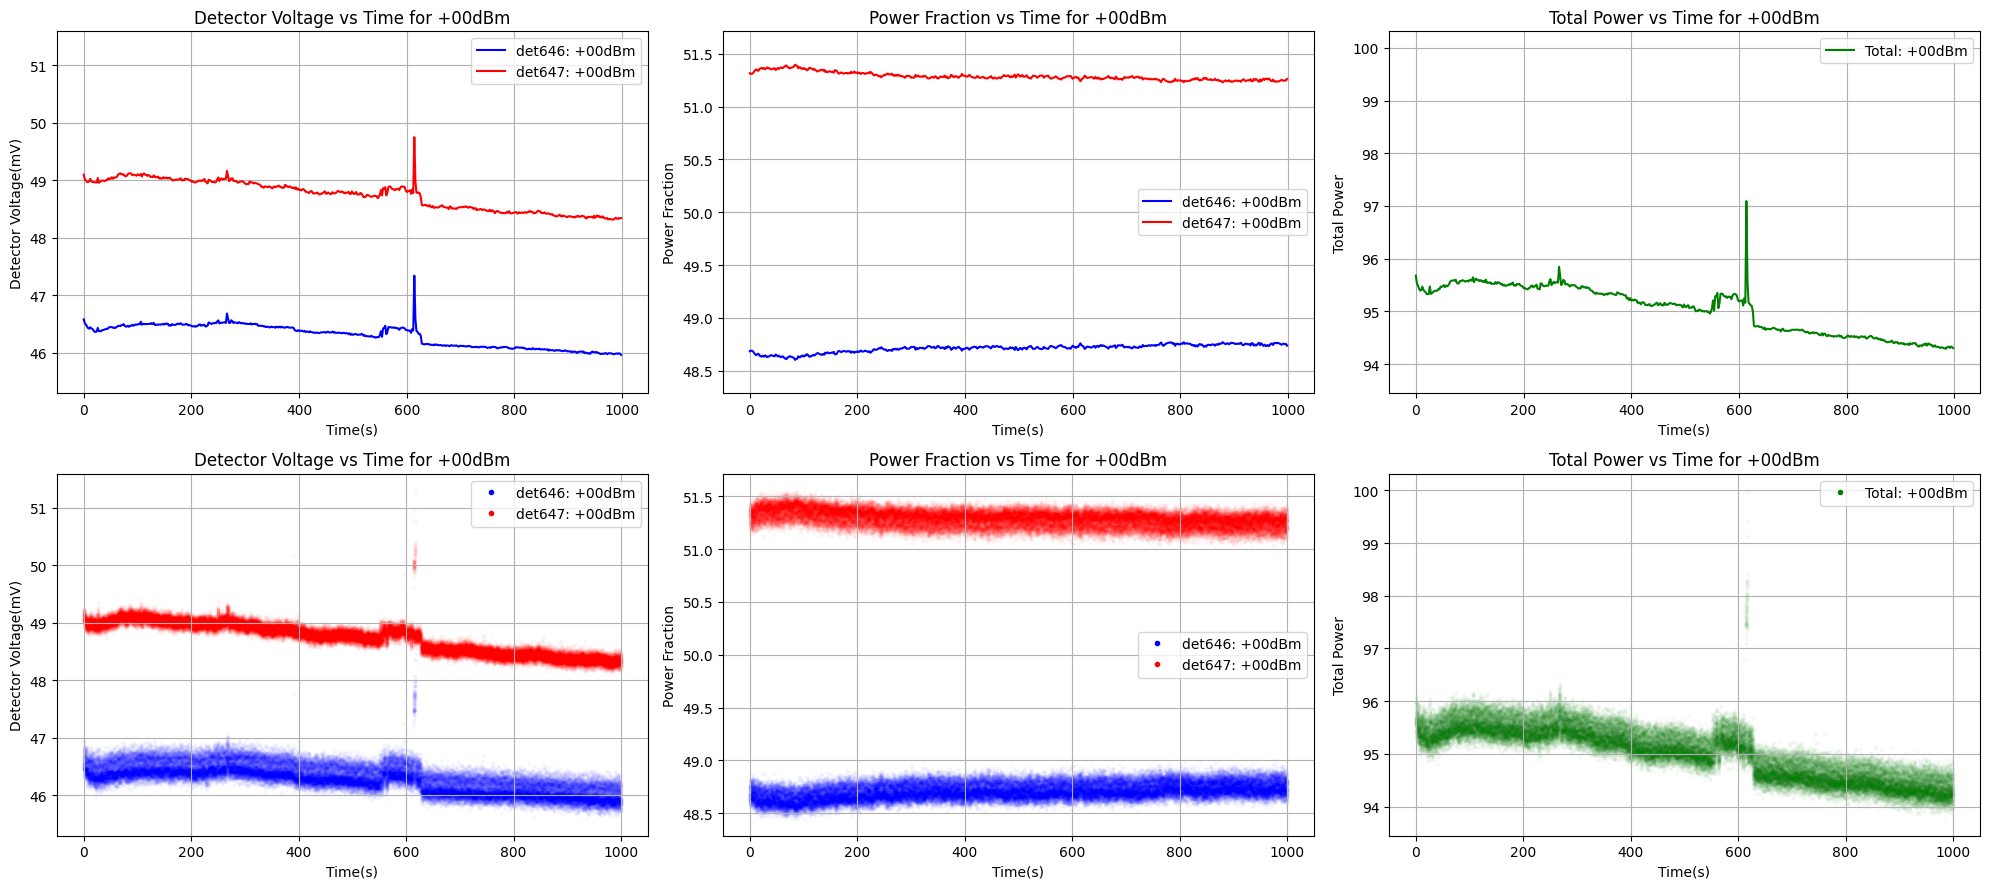

In [107]:
SeriesPlot(ver='v2', PWR='+00', sampling_freq=50, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=500e-6, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1)

The same experiment is run, but with the -20dB directional couper and source b instead of source a

In [108]:
#Splitter to QH
#Other source
#Long detector time-series
#Directional coupler dependance test
#14:20 7/10

There are 50000 Points In Total
The Sampling Rate is 1Hz
Aperture is 50 ms
Line Plots Averaging Every 100 Points
Scatter Plots Averaging Every 1 Points
Timescale units are hours
Signal Is Normalized



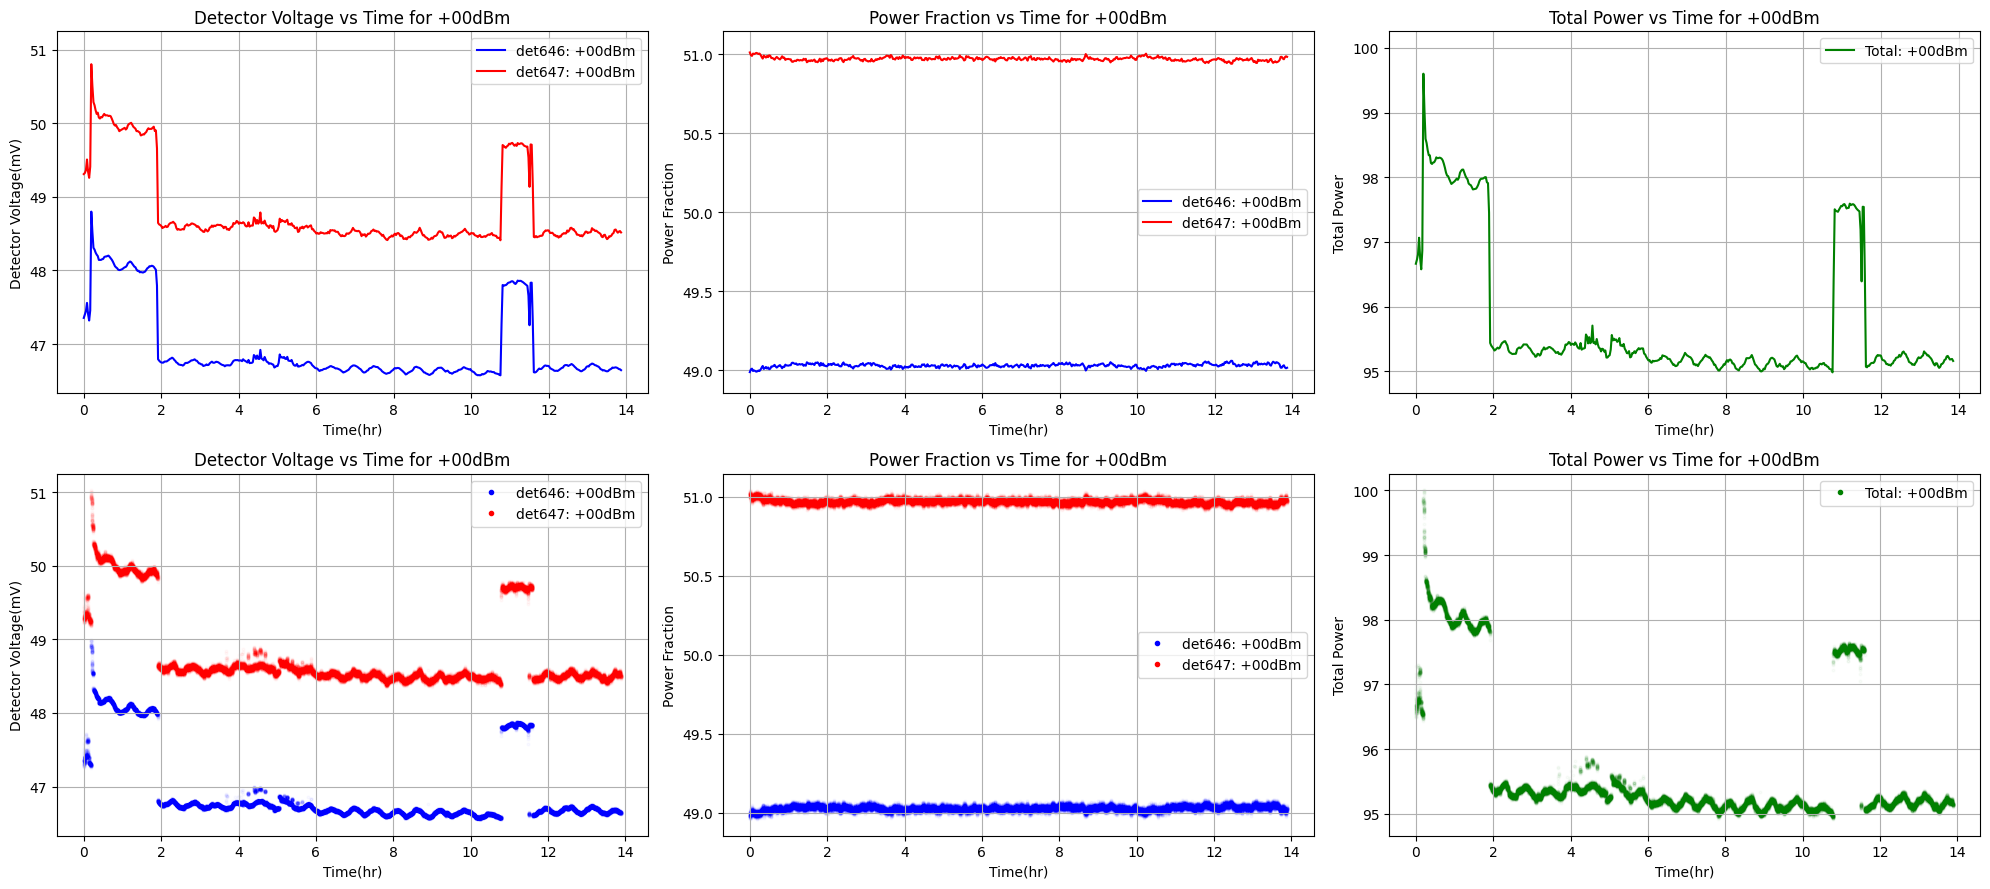

In [109]:
SeriesPlot(ver='v3', PWR='+00', sampling_freq=1, Slice_Size=100, Scatter_Slice=1, n=50000, aperture=50e-3, figsize=(20,9), alpha=0.025, size=4, normalized=Normv1, timescale='hours')